<a href="https://colab.research.google.com/github/daeun118/24_2_ML_in_Finance/blob/%EC%A7%80%EC%97%AD%EC%BB%AC%EB%9F%BCsouth%ED%86%B5%ED%95%A9/ML_in_Finance_TermProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **데이터 로드**

In [2]:
# 구글드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Machine learning in Finance/텀프로젝트/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## **폴드 나누기(k=4)**

In [6]:
from sklearn.model_selection import KFold

# KFold 설정
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# 각 폴드를 저장할 리스트
folds = []

# 데이터 나누기
for train_index, test_index in kf.split(data):
    train_data, test_data = data.iloc[train_index], data.iloc[test_index]
    folds.append((train_data, test_data))  # 각 폴드를 리스트에 저장

# 확인 예시
print(f"총 {len(folds)}개의 폴드가 생성되었습니다.")

총 4개의 폴드가 생성되었습니다.


In [7]:
# 각 fold를 개별 변수에 할당
fold0_train, fold0_test = folds[0]
fold1_train, fold1_test = folds[1]
fold2_train, fold2_test = folds[2]
fold3_train, fold3_test = folds[3]

# 확인 예시
print("Fold 0 - Train Data:")
print(fold0_train.shape)
print("\nFold 0 - Test Data:")
print(fold0_test.shape)

fold0_train.head()


Fold 0 - Train Data:
(1003, 7)

Fold 0 - Test Data:
(335, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **EDA**

##결측치 확인

In [8]:
for i, (train_data, test_data) in enumerate(folds):
    missing_values = train_data.isnull().sum().sum()  # 결측치 총합 계산
    print(f'폴드 {i}의 트레인 데이터 결측치 개수: {missing_values}')

폴드 0의 트레인 데이터 결측치 개수: 0
폴드 1의 트레인 데이터 결측치 개수: 0
폴드 2의 트레인 데이터 결측치 개수: 0
폴드 3의 트레인 데이터 결측치 개수: 0


## fold0 - pair plot, correlation matrix

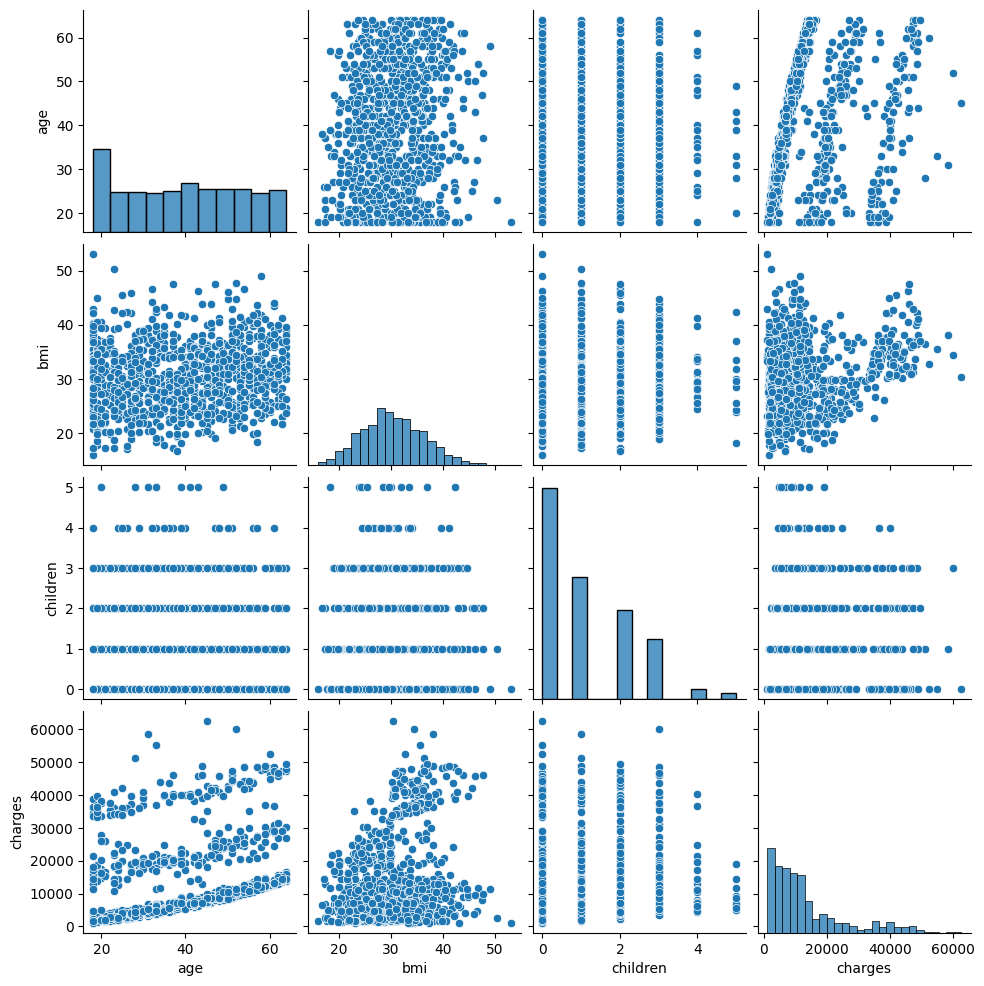

In [9]:
# 수치형 변수만 선택
fold0_numeric = fold0_train.select_dtypes(include=['float64', 'int64'])

sns.pairplot(fold0_numeric)
plt.show()


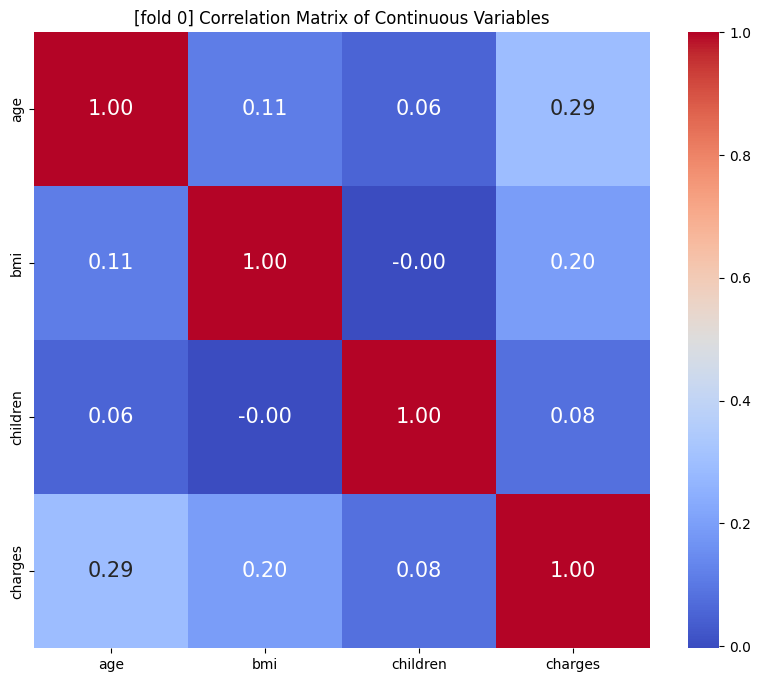

In [10]:
# 상관관계 행렬 계산 및 시각화
corr_matrix0 = fold0_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix0, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 15})
plt.title('[fold 0] Correlation Matrix of Continuous Variables')
plt.show()

## fold1 - pair plot, correlation matrix

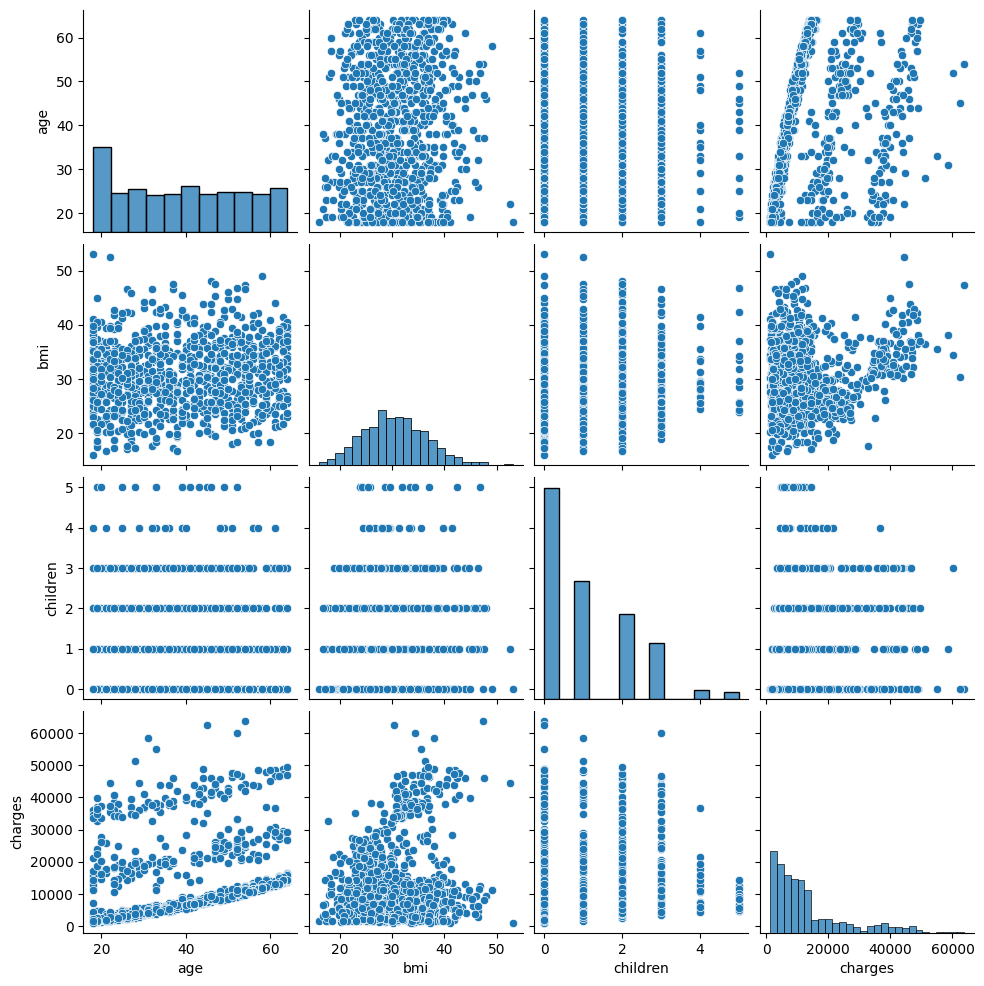

In [11]:
# 수치형 변수만 선택
fold1_numeric = fold1_train.select_dtypes(include=['float64', 'int64'])

sns.pairplot(fold1_numeric)
plt.show()


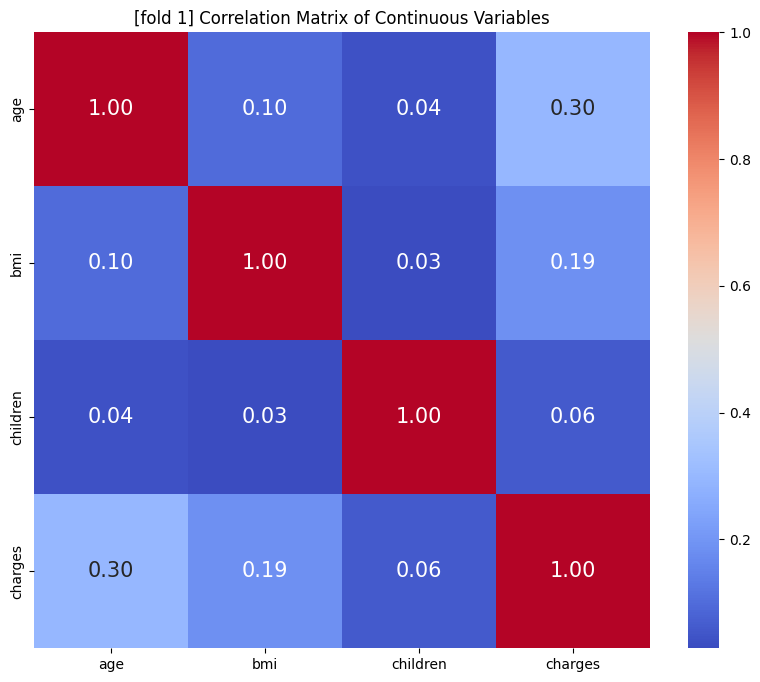

In [12]:
# 상관관계 행렬 계산 및 시각화
corr_matrix1 = fold1_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 15})
plt.title('[fold 1] Correlation Matrix of Continuous Variables')
plt.show()

## fold2 - pair plot, correlation matrix

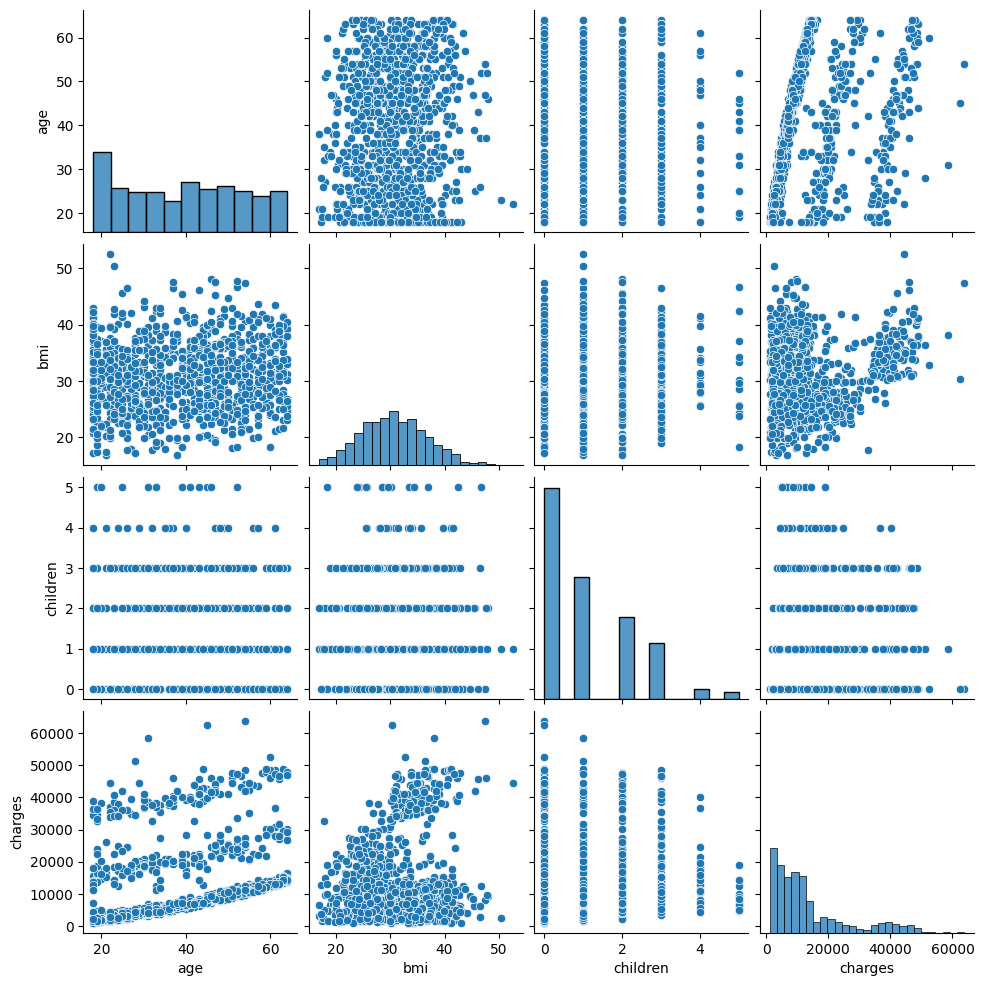

In [13]:
# 수치형 변수만 선택
fold2_numeric = fold2_train.select_dtypes(include=['float64', 'int64'])

sns.pairplot(fold2_numeric)
plt.show()


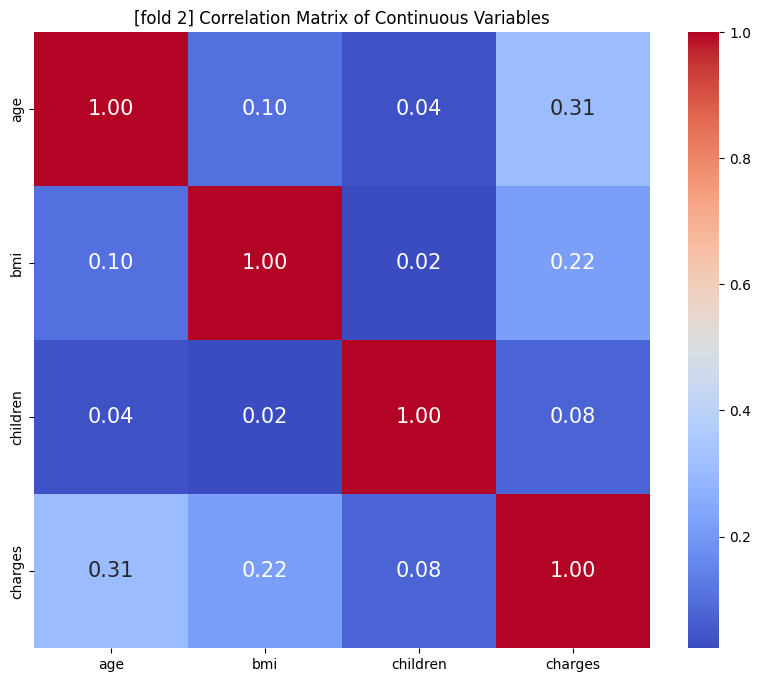

In [14]:
# 상관관계 행렬 계산 및 시각화
corr_matrix2 = fold2_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 15})
plt.title('[fold 2] Correlation Matrix of Continuous Variables')
plt.show()

## fold3 - pair plot, correlation matrix

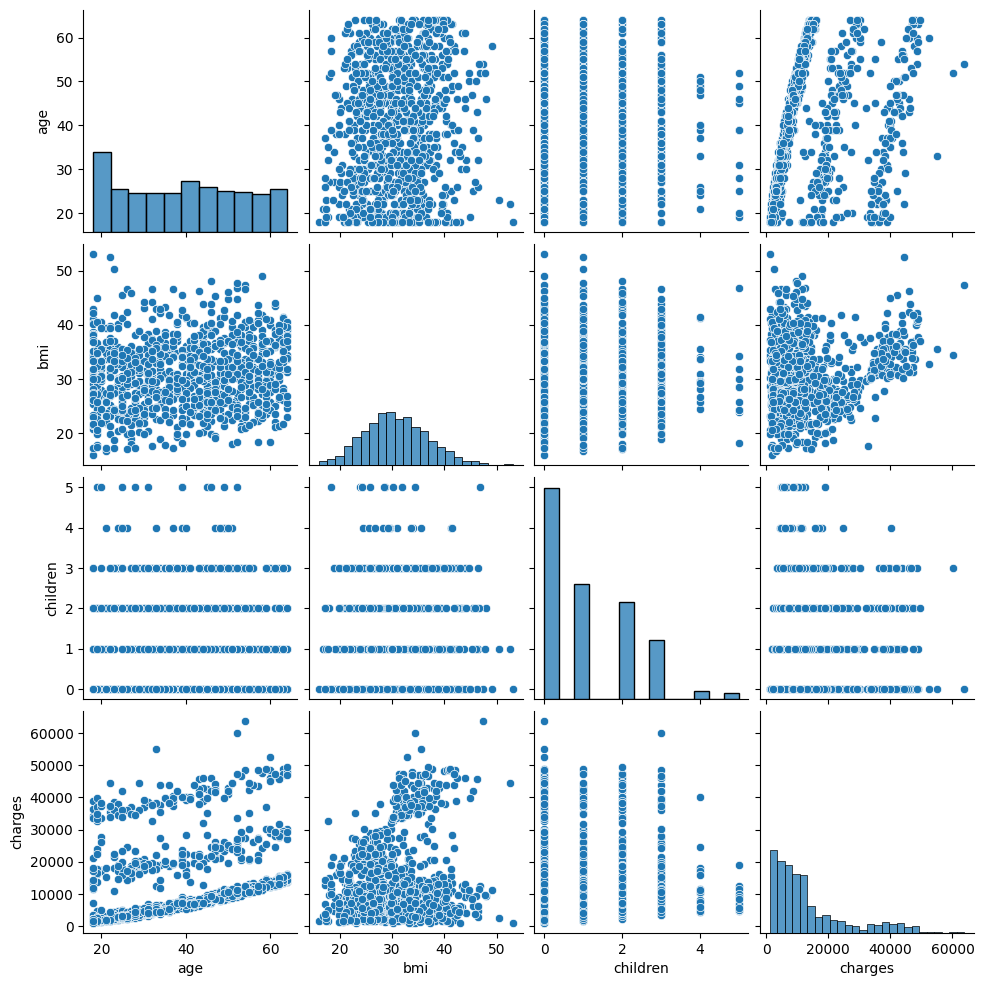

In [15]:
# 수치형 변수만 선택
fold3_numeric = fold3_train.select_dtypes(include=['float64', 'int64'])

sns.pairplot(fold3_numeric)
plt.show()


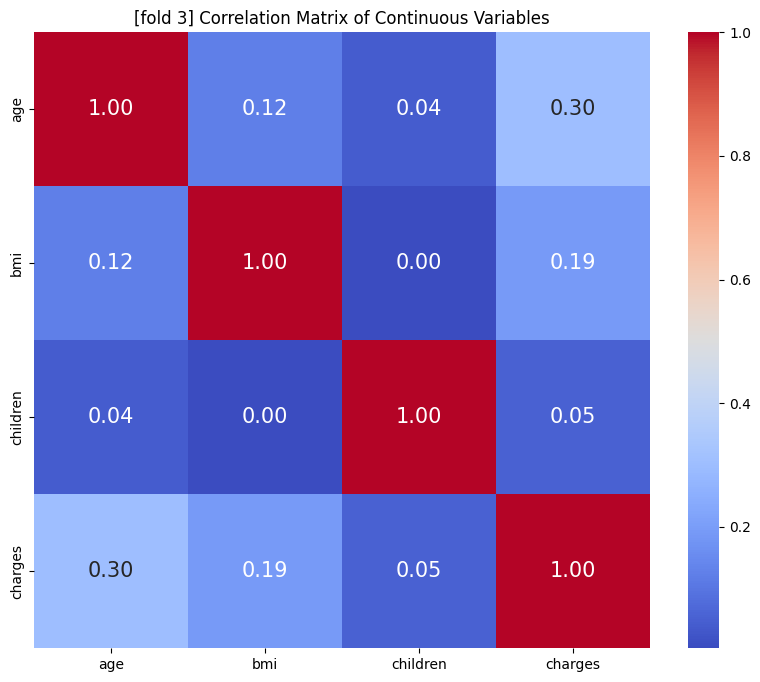

In [16]:
# 상관관계 행렬 계산 및 시각화
corr_matrix3 = fold3_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"fontsize": 15})
plt.title('[fold 3] Correlation Matrix of Continuous Variables')
plt.show()

- 4개의 폴드에서 데이터 분포가 매우 유사함 -> 즉, 폴드가 적절히 분리되었음을 알 수 있다.

## **children 컬럼 categorical로 변환**


children은 데이터셋에서 연속형 변수지만, 분포를 봤을 때 categorical 변수로 처리하는 것이 더 적절해 보인다.

**무자녀/자녀 있음(1~2명)/다자녀(3명 이상) 의 3개의 카테고리로 변환한다.**

In [17]:
def convert_children_to_category(df):
    if 'children' in df.columns:
        df = df.copy()  # 명확히 복사본을 만들어 원본에서 작업 방지
        df['children_category'] = pd.cut(
            df['children'],
            bins=[-0.1, 0, 2, 5],
            labels=['NoKid', 'OneTwoKids', 'ThreePlusKids']
        ).astype('category')
        df.drop(columns=['children'], inplace=True)
        df.rename(columns={'children_category': 'children'}, inplace=True)
    return df

# folds의 각 train, test 데이터프레임에 함수 적용
for i in range(len(folds)):
    train, test = folds[i]
    train = convert_children_to_category(train)
    test = convert_children_to_category(test)
    folds[i] = (train, test)

In [18]:
# 각 fold의 train/test 데이터프레임에서 children 컬럼 데이터 타입 확인
for i, (train, test) in enumerate(folds):
    print(f"Fold {i} Train Info:")
    print(train.info())
    print(f"Fold {i} Test Info:")
    print(test.info())

Fold 0 Train Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1003 non-null   int64   
 1   sex       1003 non-null   object  
 2   bmi       1003 non-null   float64 
 3   smoker    1003 non-null   object  
 4   region    1003 non-null   object  
 5   charges   1003 non-null   float64 
 6   children  1003 non-null   category
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 56.0+ KB
None
Fold 0 Test Info:
<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 10 to 1334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       335 non-null    int64   
 1   sex       335 non-null    object  
 2   bmi       335 non-null    float64 
 3   smoker    335 non-null    object  
 4   region    335 non-null    object  
 5   charges   335 non-null    float64 


## 정규성 검정

In [19]:
# 수치형 변수만 선택
fold0_num_train = folds[0][0].select_dtypes(include=['float64', 'int64'])
fold1_num_train = folds[1][0].select_dtypes(include=['float64', 'int64'])
fold2_num_train = folds[2][0].select_dtypes(include=['float64', 'int64'])
fold3_num_train = folds[3][0].select_dtypes(include=['float64', 'int64'])
fold3_num_train

,age,bmi,charges
0,19,27.900,16884.92400
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
5,31,25.740,3756.62160
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


In [20]:
# 수치형 변수만 선택 - 테스트셋
# 수치형 변수 데이터를 리스트에 모으기(테스트셋): numeric_data_list_test
fold0_num_test = folds[0][1].select_dtypes(include=['float64', 'int64'])
fold1_num_test = folds[1][1].select_dtypes(include=['float64', 'int64'])
fold2_num_test = folds[2][1].select_dtypes(include=['float64', 'int64'])
fold3_num_test = folds[3][1].select_dtypes(include=['float64', 'int64'])

numeric_data_list_test = [fold0_num_test, fold1_num_test, fold2_num_test, fold3_num_test]

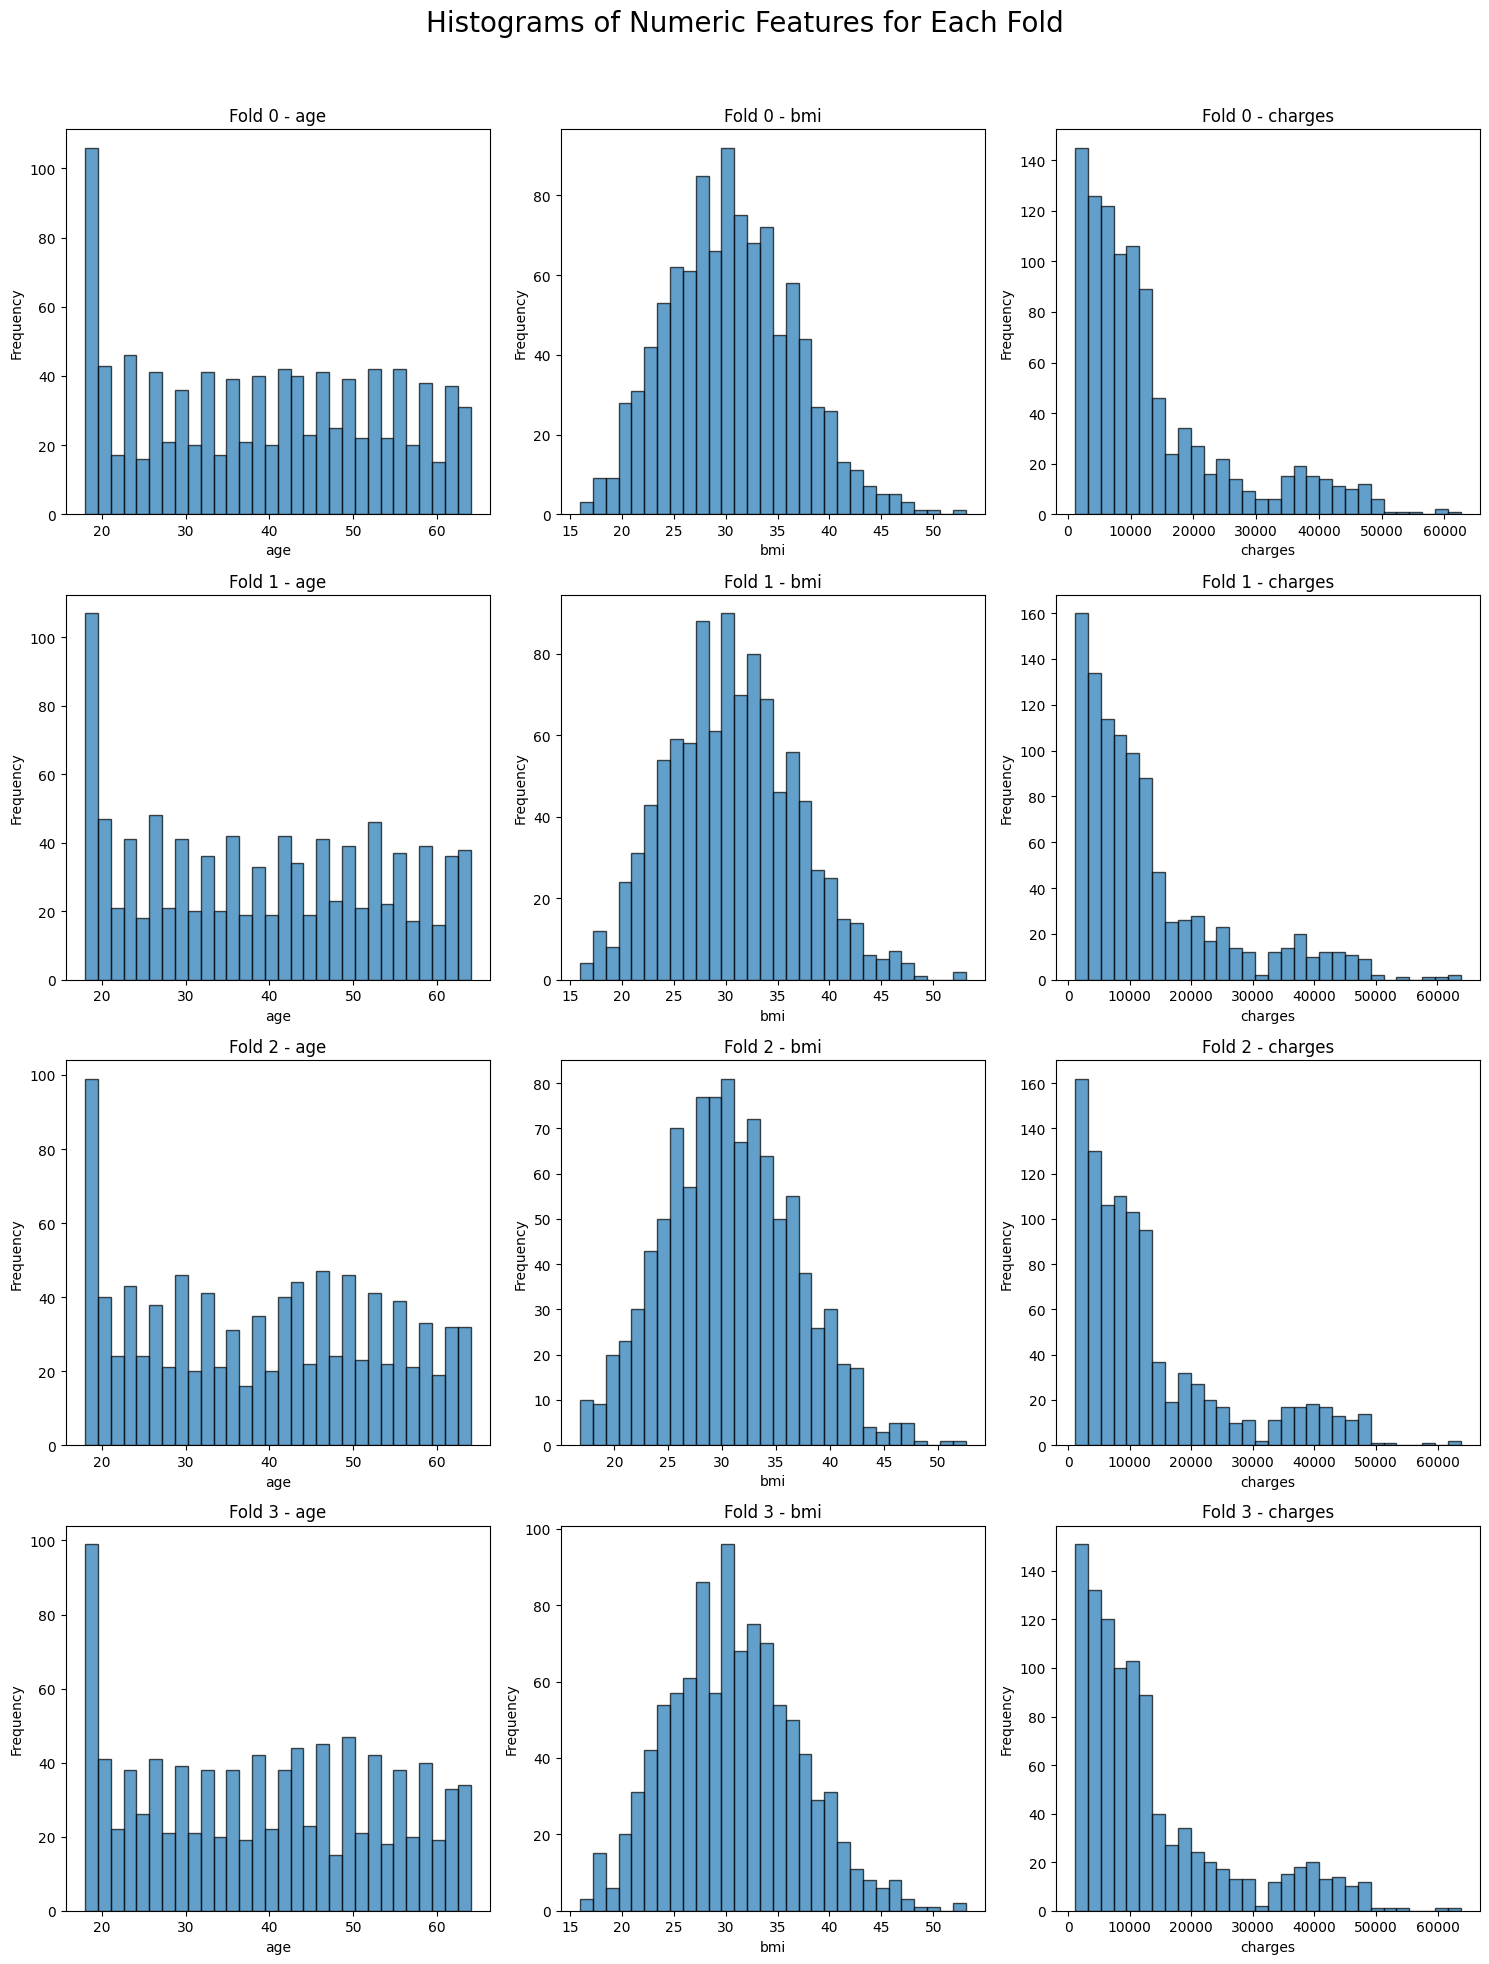

In [21]:
import matplotlib.pyplot as plt

# 수치형 변수 데이터를 리스트에 모으기
numeric_data_list = [fold0_num_train, fold1_num_train, fold2_num_train, fold3_num_train]
fold_names = ["Fold 0", "Fold 1", "Fold 2", "Fold 3"]

# 서브플롯 설정 (4개의 폴드, 각 폴드마다 수치형 변수 개수만큼 열 생성)
fig, axes = plt.subplots(4, len(fold0_num_train.columns), figsize=(15, 20))
fig.suptitle('Histograms of Numeric Features for Each Fold', fontsize=20)

# 각 폴드의 수치형 변수 데이터로 반복문 수행
for fold_index, numeric_data in enumerate(numeric_data_list):
    for col_index, col in enumerate(numeric_data.columns):
        ax = axes[fold_index, col_index]

        # 히스토그램 생성
        ax.hist(numeric_data[col], bins=30, edgecolor='k', alpha=0.7)
        ax.set_title(f'{fold_names[fold_index]} - {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 전체 제목을 위한 여백 설정
plt.show()


### Shapiro-Wilk Test(정규성 검정)

In [22]:
from scipy.stats import shapiro

# 각 폴드의 수치형 변수에 대해 정규성 검정 수행
for fold_index, numeric_data in enumerate(numeric_data_list):
    print(f"=== Fold {fold_index} ===")
    for col in numeric_data.columns:
        stat, p_value = shapiro(numeric_data[col])
        print(f"{col} - Shapiro-Wilk Test p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  -> {col} 변수는 정규성을 만족하지 않음 (p < 0.05)")
        else:
            print(f"  -> {col} 변수는 정규성을 만족함 (p >= 0.05)")
    print("\n")


=== Fold 0 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0003
  -> bmi 변수는 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 정규성을 만족하지 않음 (p < 0.05)


=== Fold 1 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0002
  -> bmi 변수는 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 정규성을 만족하지 않음 (p < 0.05)


=== Fold 2 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0010
  -> bmi 변수는 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 정규성을 만족하지 않음 (p < 0.05)


=== Fold 3 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0002
  -> bmi 변수는 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 정규

- 4개의 폴드에서, 3개의 컬럼 모두 p-value가 0.05보다 작다. 따라서 3개의 컬럼 모두 정규 분포를 따르지 않는다.

**label이 정규분포를 따르지 않음 -> 비모수적 방법 활용(스피어만 상관계수)**

## transformation(로그 변환) - charges(label)만 로그 변환

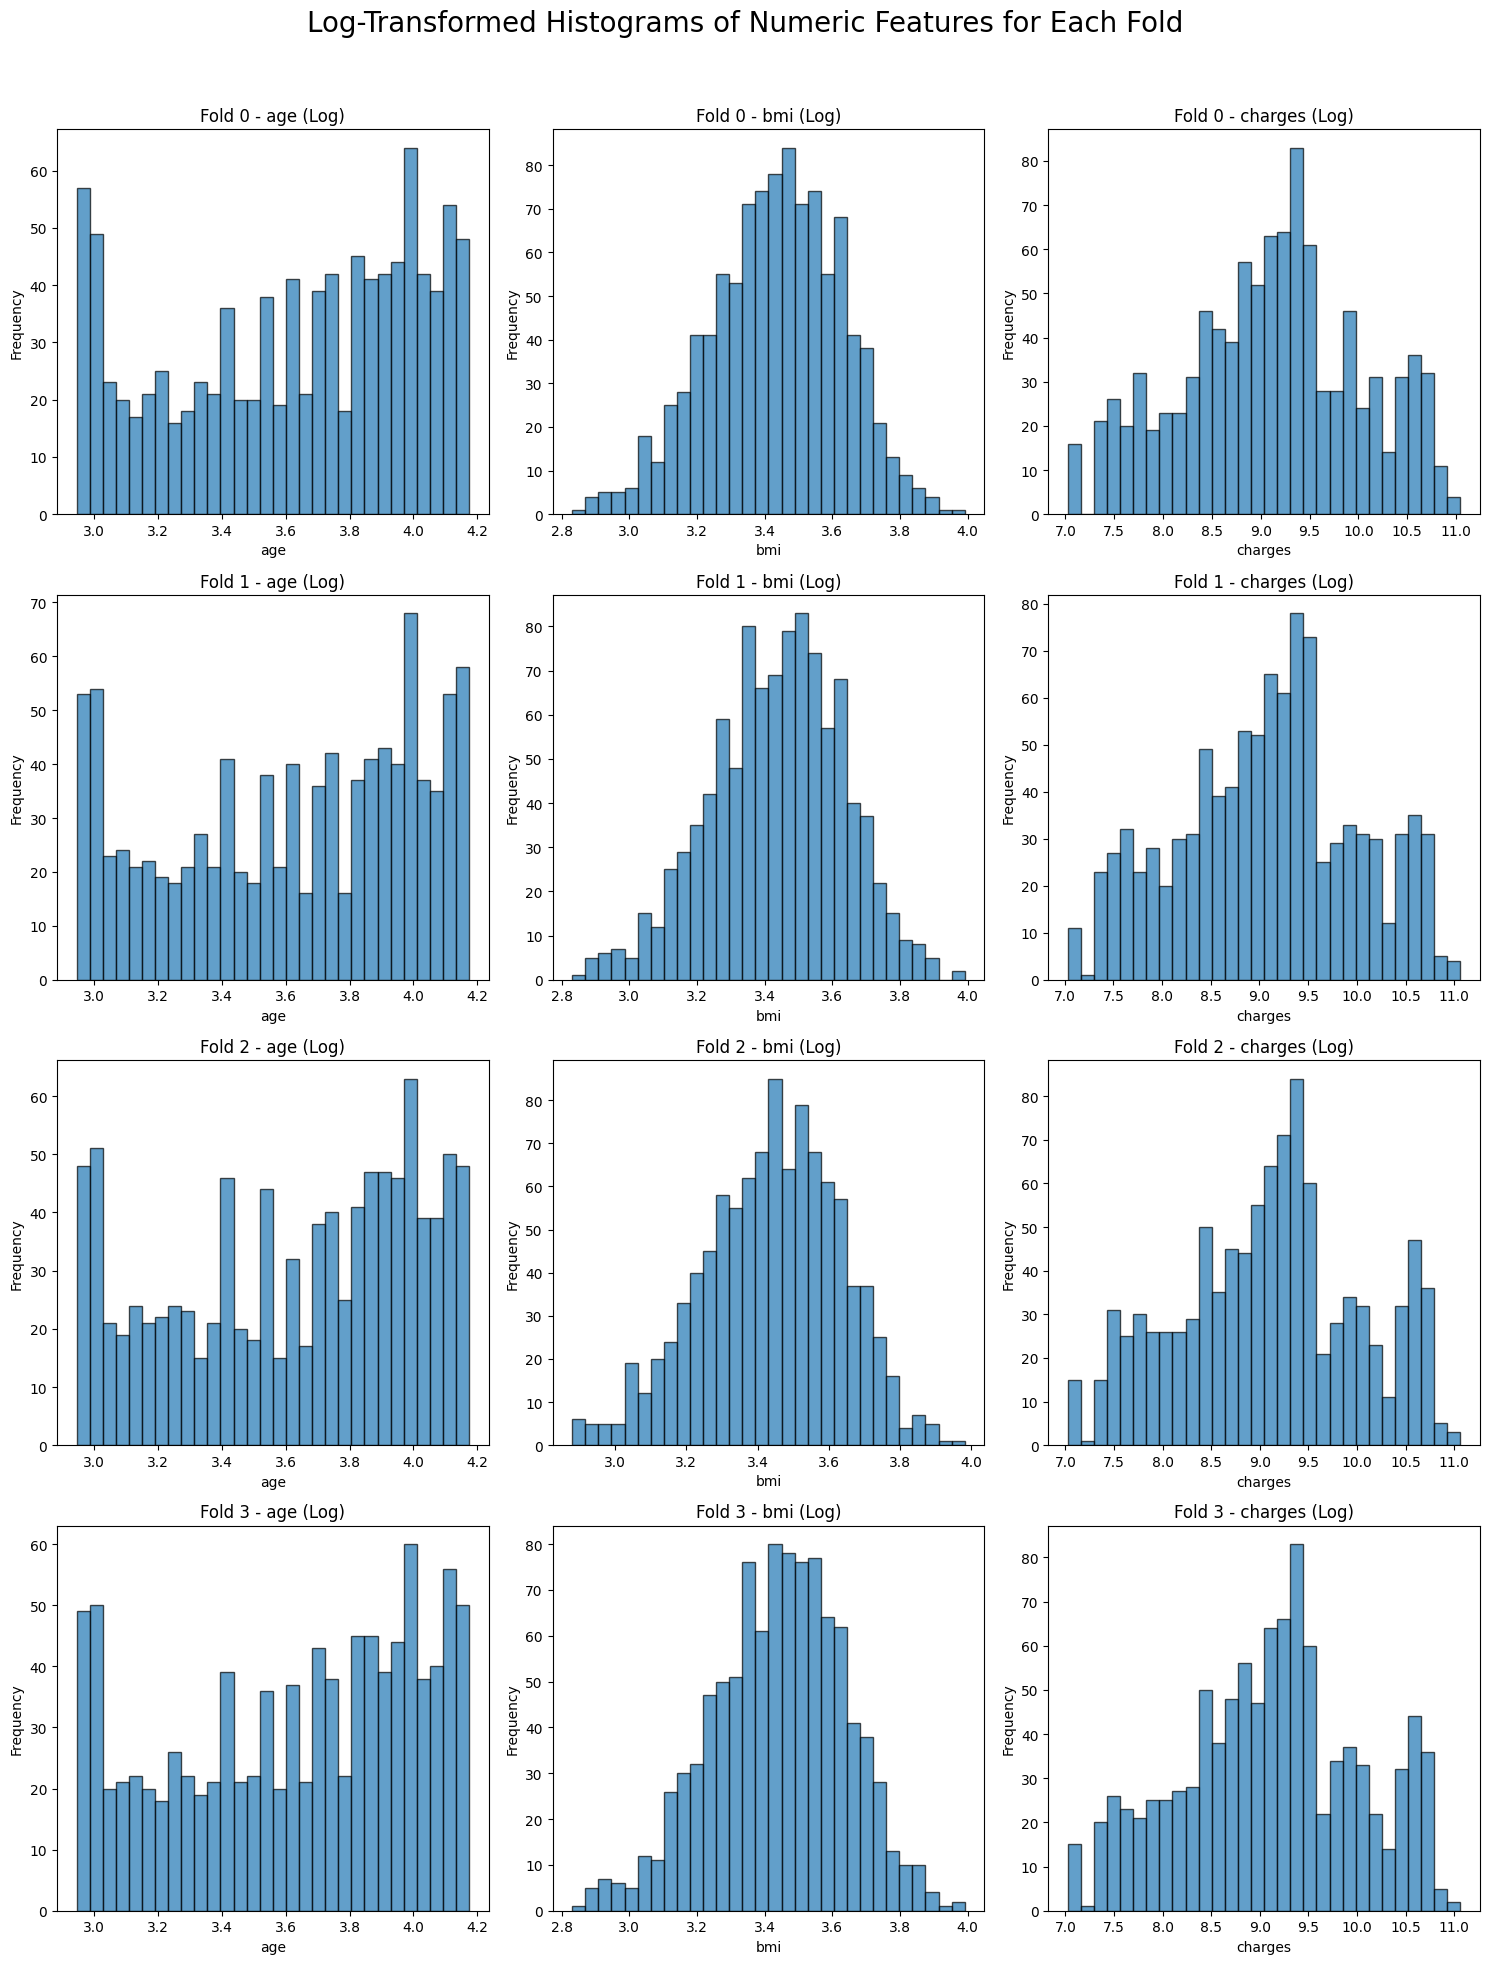

In [23]:
# 각 폴드의 수치형 변수에 로그 변환 적용
log_transformed_data = [np.log1p(df) for df in numeric_data_list]

# 서브플롯 설정 (4개의 폴드, 각 폴드마다 수치형 변수 개수만큼 열 생성)
fig, axes = plt.subplots(4, len(fold0_num_train.columns), figsize=(15, 20))
fig.suptitle('Log-Transformed Histograms of Numeric Features for Each Fold', fontsize=20)

# 각 폴드의 수치형 변수 데이터로 반복문 수행
for fold_index, numeric_data in enumerate(log_transformed_data):
    for col_index, col in enumerate(fold0_num_train.columns):
        ax = axes[fold_index, col_index]

        # 로그 변환된 히스토그램 생성
        ax.hist(numeric_data[col], bins=30, edgecolor='k', alpha=0.7)
        ax.set_title(f'Fold {fold_index} - {col} (Log)')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [24]:
# 로그 변환 후 정규성 검정 수행
for fold_index, numeric_data in enumerate(log_transformed_data):
    print(f"=== Fold {fold_index} ===")
    for col in numeric_data.columns:
        stat, p_value = shapiro(numeric_data[col])
        print(f"{col} - Shapiro-Wilk Test p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  -> {col} 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)")
        else:
            print(f"  -> {col} 변수는 정규성을 만족함 (p >= 0.05)")
    print("\n")


=== Fold 0 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0050
  -> bmi 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)


=== Fold 1 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0032
  -> bmi 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)


=== Fold 2 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0003
  -> bmi 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-Wilk Test p-value: 0.0000
  -> charges 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)


=== Fold 3 ===
age - Shapiro-Wilk Test p-value: 0.0000
  -> age 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
bmi - Shapiro-Wilk Test p-value: 0.0032
  -> bmi 변수는 여전히 정규성을 만족하지 않음 (p < 0.05)
charges - Shapiro-W

**>>> 로그 변환이 유의미한 효과가 없음 -> 변환하지 않고, 정규성을 강하게 요구하지 않는 모델 사용 계획**


### charges만 로그 변환

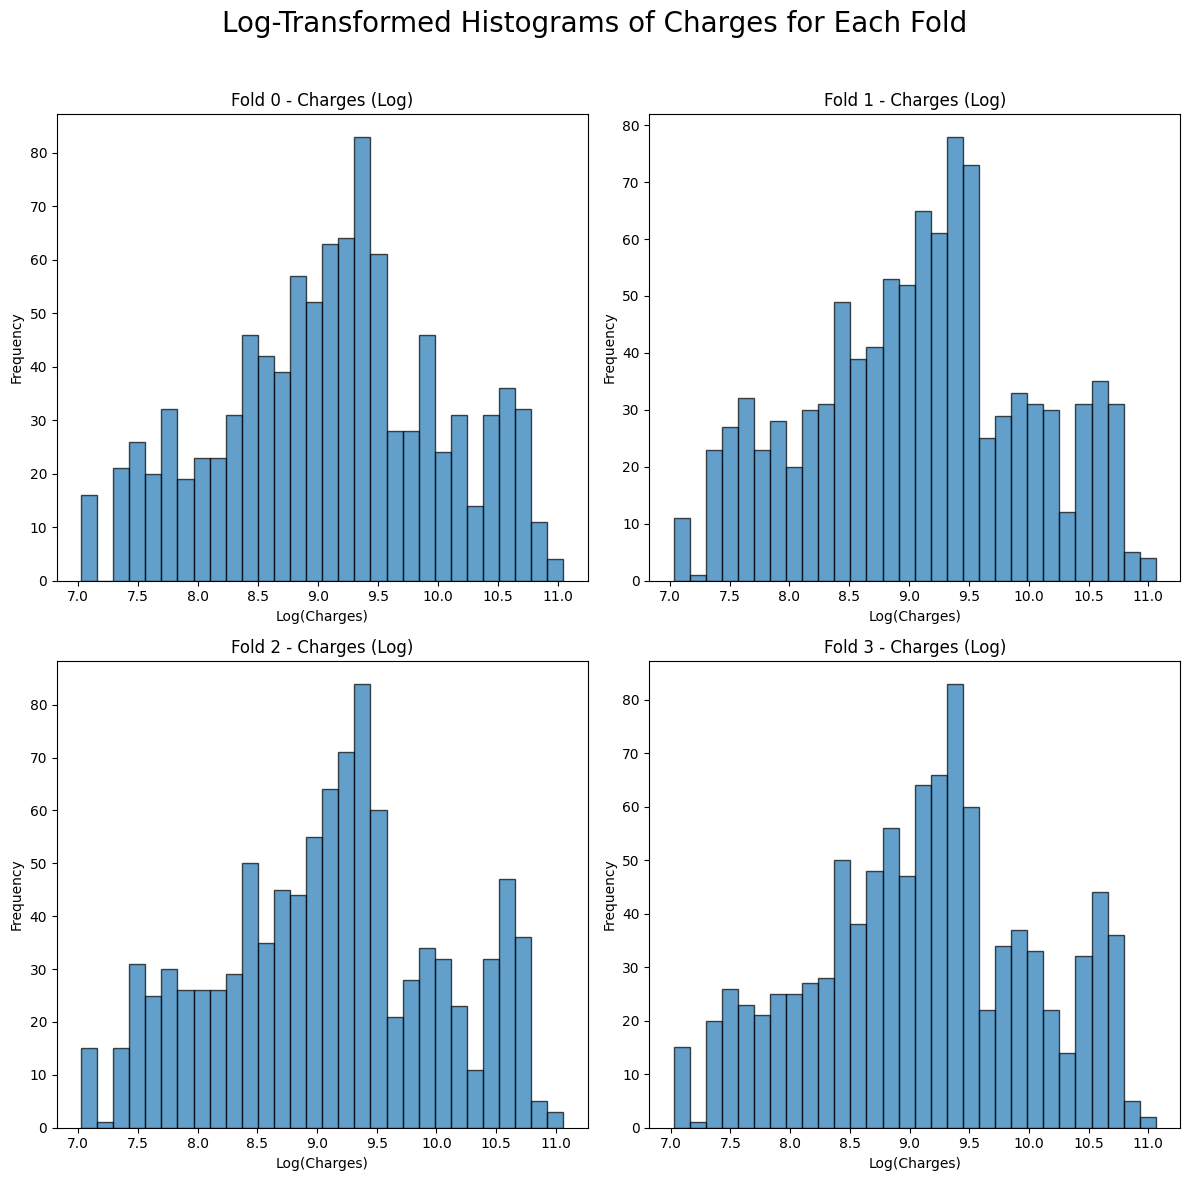

In [25]:
# charges만 로그 변환 적용
log_tf_charges = [
    df.assign(charges=np.log1p(df['charges'])) for df in numeric_data_list
]

# 서브플롯 설정 (2x2로 서브플롯 구성)
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2행 2열
fig.suptitle('Log-Transformed Histograms of Charges for Each Fold', fontsize=20)

# 각 폴드의 charges 데이터로 반복문 수행
for fold_index, numeric_data in enumerate(log_tf_charges):
    # 행과 열의 인덱스 계산
    row = fold_index // 2
    col = fold_index % 2
    ax = axes[row, col]

    # 로그 변환된 charges 히스토그램 생성
    ax.hist(numeric_data['charges'], bins=30, edgecolor='k', alpha=0.7)
    ax.set_title(f'Fold {fold_index} - Charges (Log)')
    ax.set_xlabel('Log(Charges)')
    ax.set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [26]:
# charges만 로그 변환 적용 - 테스트셋
log_tf_test = [
    df.assign(charges=np.log1p(df['charges'])) for df in numeric_data_list_test
]

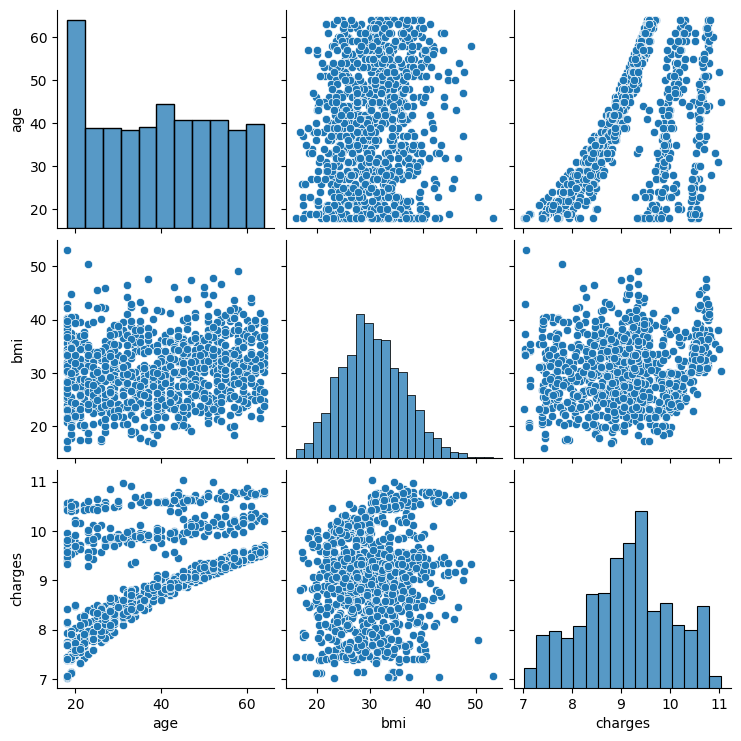

In [27]:
# 로그변환 후 numeric_data_list 컬럼 간 관계 시각화
sns.pairplot(log_tf_charges[0])

- charges 로그변환 후에도 age와 charges 사이에 비선형 관계가 보임.

-> age를 제곱한 항을 하나 만들어야 하나?

- age는 산점도에서 왜 3그룹으로 나뉜거지

## 스케일링

In [28]:
# charges만 로그변환된 데이터 log_tf_charges 사용

# standardscaler 사용하여 스케일링
from sklearn.preprocessing import StandardScaler

scaled_data_list = []

for i, (train, test) in enumerate(folds):
    scaler = StandardScaler()

    # 이미 분리된 수치형 데이터에서 charges 컬럼 제외
    train_numeric = log_tf_charges[i].drop(columns=['charges'])
    test_numeric = log_tf_test[i].drop(columns=['charges'])

    # 수치형 변수 스케일링 적용
    train_scaled_numeric = pd.DataFrame(scaler.fit_transform(train_numeric), columns=train_numeric.columns).reset_index(drop=True)
    test_scaled_numeric = pd.DataFrame(scaler.transform(test_numeric), columns=test_numeric.columns).reset_index(drop=True)

    # 레이블 컬럼을 별도로 유지
    train_label = log_tf_charges[i]['charges'].reset_index(drop=True)
    test_label = log_tf_test[i]['charges'].reset_index(drop=True)

    # 카테고리컬 변수 선택 및 결합
    train_categorical = train.select_dtypes(exclude=['float64', 'int64']).reset_index(drop=True)
    test_categorical = test.select_dtypes(exclude=['float64', 'int64']).reset_index(drop=True)

    # 최종 데이터 결합 (스케일링된 수치형 변수, 카테고리컬 변수, 레이블 순서)
    train_scaled = pd.concat([train_scaled_numeric, train_categorical, train_label], axis=1)
    test_scaled = pd.concat([test_scaled_numeric, test_categorical, test_label], axis=1)

    # 스케일링된 train, test 데이터를 리스트에 저장
    scaled_data_list.append((train_scaled, test_scaled))

## **categorical 컬럼 더미 변수화**

In [29]:
scaled_data_list[0][0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1003 non-null   float64 
 1   bmi       1003 non-null   float64 
 2   sex       1003 non-null   object  
 3   smoker    1003 non-null   object  
 4   region    1003 non-null   object  
 5   children  1003 non-null   category
 6   charges   1003 non-null   float64 
dtypes: category(1), float64(3), object(3)
memory usage: 48.2+ KB


In [30]:
scaled_data_list[0][0]

,age,bmi,sex,smoker,region,children,charges
0,-1.443492,-0.434564,female,yes,southwest,NoKid,9.734236
1,-1.514757,0.542123,male,no,southeast,OneTwoKids,7.453882
2,-0.802106,0.414006,male,no,southeast,ThreePlusKids,8.400763
3,-0.445780,-1.298942,male,no,northwest,NoKid,9.998137
4,-0.517045,-0.271506,male,no,northwest,NoKid,8.260455
...,...,...,...,...,...,...,...
998,0.908258,2.360726,female,no,southwest,ThreePlusKids,9.342481
999,0.765727,0.076242,male,no,northwest,ThreePlusKids,9.268755
1000,-1.514757,1.054593,female,no,southeast,NoKid,7.396847
1001,-1.300962,-0.783976,female,no,southwest,NoKid,7.605365


- sex, smoker, region, children 컬럼에 더미 변수화를 적용시켜야 한다.

In [31]:
for i, (train, test) in enumerate(scaled_data_list):
    print(f"Fold {i} - Train Data Categorical Variable Unique Counts")
    print(train.select_dtypes(include=['object', 'category']).nunique())
    print("\n" + "="*50 + "\n")

    print(f"Fold {i} - Test Data Categorical Variable Unique Counts")
    print(test.select_dtypes(include=['object', 'category']).nunique())
    print("\n" + "="*50 + "\n")


Fold 0 - Train Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 0 - Test Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 1 - Train Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 1 - Test Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 2 - Train Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 2 - Test Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 3 - Train Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int64


Fold 3 - Test Data Categorical Variable Unique Counts
sex         2
smoker      2
region      4
children    3
dtype: int6

- sex: 원핫인코딩
- smoker: 원핫인코딩
- region: 원핫인코딩
- children: 순서가 있는 범주형 변수이므로 **라벨 인코딩(0/1/2)**

In [32]:
from sklearn.preprocessing import LabelEncoder

# 결과를 저장할 리스트
final_data_list = []

# 각 폴드를 순회
for train, test in scaled_data_list:
    # 라벨 인코더 생성
    label_encoder = LabelEncoder()

    # children 변수에 라벨 인코딩 적용 (순서형 인코딩)
    train['children'] = label_encoder.fit_transform(train['children'])
    test['children'] = label_encoder.transform(test['children'])

    # 나머지 범주형 변수에 원-핫 인코딩 적용
    train_encoded = pd.get_dummies(train, columns=['sex', 'smoker', 'region'], drop_first=True)
    test_encoded = pd.get_dummies(test, columns=['sex', 'smoker', 'region'], drop_first=True)

    # 원-핫 인코딩된 범주형 변수에만 astype(int) 적용
    for col in ['sex_male', 'smoker_yes', 'region_southwest', 'region_northwest', 'region_southeast']:
        if col in train_encoded.columns:
            train_encoded[col] = train_encoded[col].astype(int)
        if col in test_encoded.columns:
            test_encoded[col] = test_encoded[col].astype(int)

    # 인코딩된 데이터프레임을 결과 리스트에 저장
    final_data_list.append((train_encoded, test_encoded))



In [33]:
final_data_list[0][0]

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.443492,-0.434564,0,9.734236,0,1,0,0,1
1,-1.514757,0.542123,1,7.453882,1,0,0,1,0
2,-0.802106,0.414006,2,8.400763,1,0,0,1,0
3,-0.445780,-1.298942,0,9.998137,1,0,1,0,0
4,-0.517045,-0.271506,0,8.260455,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
998,0.908258,2.360726,2,9.342481,0,0,0,0,1
999,0.765727,0.076242,2,9.268755,1,0,1,0,0
1000,-1.514757,1.054593,0,7.396847,0,0,0,1,0
1001,-1.300962,-0.783976,0,7.605365,0,0,0,0,1


# **fold0**

## univariate results(단변량 분석)

- 연속형 변수: 단순선형회귀
- 범주형 변수: t검정, ANOVA

### 연속형 변수(age, bmi)

**단순선형회귀**

In [34]:
import statsmodels.api as sm

# Fold 0의 train 데이터
train_data_f0 = final_data_list[0][0]  # 더미 변수화, 라벨 로그변환까지 완료된 폴드 0의 train 데이터

# y 변수 설정 (타겟 변수)
y_train_f0 = train_data_f0['charges']

# Age와 Charges 간의 단일 변수 회귀 분석
X_age_f0 = sm.add_constant(train_data_f0['age'])
age_model = sm.OLS(y_train_f0, X_age_f0).fit()
print("\nAge vs Charges 단변량 회귀 분석 결과:\n")
print(age_model.summary())

# BMI와 Charges 간의 단일 변수 회귀 분석
X_bmi_f0 = sm.add_constant(train_data_f0['bmi'])
bmi_model = sm.OLS(y_train_f0, X_bmi_f0).fit()
print("\nBMI vs Charges 단변량 회귀 분석 결과:\n")
print(bmi_model.summary())




Age vs Charges 단변량 회귀 분석 결과:

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     375.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.83e-71
Time:                        01:43:57   Log-Likelihood:                -1174.9
No. Observations:                1003   AIC:                             2354.
Df Residuals:                    1001   BIC:                             2364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1026

**[age]**
- coef: 0.4781
- p값 0.05보다 작으므로 통계적으로 유의함.
- 결정계수: 0.273 -> age 변수 하나로 타겟을 27.3% 설명 가능

**[bmi]**
- coef: 0.1193
- p값 0.05보다 작으므로 통계적으로 유의함.
- 결정계수: 0.017 -> age 변수 하나로 타겟을 1.7% 설명 가능

### 범주형 변수(children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest)

In [35]:
from scipy import stats
from statsmodels.formula.api import ols

**t-검정**

In [36]:
# t-검정: sex_male과 charges의 평균 차이 검정
male_charges = train_data_f0[train_data_f0['sex_male'] == 1]['charges']
female_charges = train_data_f0[train_data_f0['sex_male'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(male_charges, female_charges)
print(f"t-검정 결과 - 남성과 여성 간의 charges 평균 차이: p-값 = {p_val}")

# t-검정: smoker_yes와 charges의 평균 차이 검정
smoker_charges = train_data_f0[train_data_f0['smoker_yes'] == 1]['charges']
nonsmoker_charges = train_data_f0[train_data_f0['smoker_yes'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(smoker_charges, nonsmoker_charges)
print(f"t-검정 결과 - 흡연자와 비흡연자 간의 charges 평균 차이: p-값 = {p_val}")

t-검정 결과 - 남성과 여성 간의 charges 평균 차이: p-값 = 0.8625628197979779
t-검정 결과 - 흡연자와 비흡연자 간의 charges 평균 차이: p-값 = 1.6001009475832826e-127


**ANOVA**

In [37]:
# ANOVA: children 변수와 charges의 평균 차이 검정
anova_children = ols('charges ~ C(children)', data=train_data_f0).fit()
anova_children_table = sm.stats.anova_lm(anova_children, typ=2)
print("\nANOVA 결과 - 자녀 수에 따른 charges 평균 차이:\n", anova_children_table)

# ANOVA: region 변수와 charges의 평균 차이 검정
anova_region = ols('charges ~ C(region_northwest) + C(region_southeast) + C(region_southwest)', data=train_data_f0).fit()
anova_region_table = sm.stats.anova_lm(anova_region, typ=2)
print("\nANOVA 결과 - 지역별 charges 평균 차이:\n", anova_region_table)


ANOVA 결과 - 자녀 수에 따른 charges 평균 차이:
                  sum_sq      df         F        PR(>F)
C(children)   28.075963     2.0  17.27485  4.210370e-08
Residual     812.625343  1000.0       NaN           NaN

ANOVA 결과 - 지역별 charges 평균 차이:
                          sum_sq     df         F    PR(>F)
C(region_northwest)    0.645690    1.0  0.768841  0.380787
C(region_southeast)    0.653280    1.0  0.777878  0.378003
C(region_southwest)    1.665878    1.0  1.983606  0.159322
Residual             838.982972  999.0       NaN       NaN


- **흡연 여부(smoker_yes)**, **자녀 수(children)** 변수가 charges에 유의미한 영향을 미친다.(p값이 0.05 미만)

## multivariate results(다변량 분석)

### 다중선형회귀분석

- fold0의 train 데이터 : train_data_f0
- y label 지정해놓음: y_f0 = train_data_f0['charges']

In [38]:
# 전체 feature로 다중선형회귀분석
f0X0 = train_data_f0.drop(columns=['charges'])
f0X0 = sm.add_constant(f0X0)

f0X0_model = sm.OLS(y_train_f0, f0X0).fit()
f0X0_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     398.0
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.14e-303
Time:                        01:43:57   Log-Likelihood:                -614.63
No. Observations:                1003   AIC:                             1247.
Df Residuals:                     994   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7918      0.036    244.694      0.000       8.721       8.862
age                  0.4839      0.014     33.765      0.000       0.456       0.512
bmi                  0.0798      0.015      5.393      0.000       0.051       0.109
children             0.1503      0.020      7.484      0.000       0.111       0.190
sex_male            -0.0731      0.028     -2.572      0.010      -0.129      -0.017
smoker_yes           1.5453      0.035     43.891      0.000       1.476       1.614
region_northwest    -0.0566      0.040     -1.405      0.160      -0.136       0.022
region_southeast    -0.1421      0.041     -3.467      0.001      -0.223      -0.062
region_southwest    -0.1164      0.040     -2.874      0.004      -0.196      -0.037
==============================================================================
Omnibus:                      331.809   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1098.933
Skew:                           1.611   Prob(JB):                    2.34e-239
Kurtosis:                       6.989   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모든 피쳐를 넣어서 다중회귀분석한 결과 **region_northwest를 제외한 모든 피쳐가 통계적으로 유의하다(p-value<0.05)**
- 전체 모델은 통계적으로 유의
- 결정계수: 0.762
- 유의하지 않은 피쳐를 제외하고 다시 다중회귀분석 시행

- 지역: 남동, 남서부 지역에서 통계적으로 유의미하게 보험료가 낮음(coef 방향이 음수로 같음) -> 이 두개 컬럼 통합해도 될 것 같다.*(브랜치 만들어서 진행하기)*

In [39]:
# region_northwest 변수들 제외하고 다중선형회귀분석 시행
f0X1 = train_data_f0[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest']]
f0X1 = sm.add_constant(f0X1)

f0X1_model = sm.OLS(y_train_f0, f0X1).fit()
f0X1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     454.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.38e-304
Time:                        01:43:57   Log-Likelihood:                -615.62
No. Observations:                1003   AIC:                             1247.
Df Residuals:                     995   BIC:                             1287.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7641      0.030    292.069      0.000       8.705       8.823
age                  0.4836      0.014     33.733      0.000       0.455       0.512
bmi                  0.0792      0.015      5.356      0.000       0.050       0.108
children             0.1499      0.020      7.460      0.000       0.110       0.189
sex_male            -0.0736      0.028     -2.592      0.010      -0.129      -0.018
smoker_yes           1.5467      0.035     43.927      0.000       1.478       1.616
region_southeast    -0.1139      0.036     -3.186      0.001      -0.184      -0.044
region_southwest    -0.0882      0.035     -2.506      0.012      -0.157      -0.019
==============================================================================
Omnibus:                      330.649   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1089.634
Skew:                           1.608   Prob(JB):                    2.45e-237
Kurtosis:                       6.967   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 유의하지 않은 피쳐를 제거한 X변수(f0X1)를 사용해서 다중선형회귀를 시행한 결과 결정계수(0.762) -> 이전과 동일

-> 제거된 변수들이 모델의 설명력에 기여하지 않았다.

### interaction effects 살펴보기
- 유의한 모든 피쳐 + interaction feature 살펴보기

- smoker_yes * bmi
- sex_male * smoker
- children과 smoker_yes는 correlation은 있어 보인다(아이 낳으면 금연하는 경우) interaction도 있을까?

In [40]:
# smoker_yes * bmi

# interaction feature 생성
train_data_f0['smoker_bmi'] = train_data_f0['smoker_yes'] * train_data_f0['bmi']

# X변수 설정 - f0X2
f0X2 = train_data_f0[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'smoker_bmi']]
f0X2 = sm.add_constant(f0X2)

# OLS 모델 fitting
f0X2_model = sm.OLS(y_train_f0, f0X2).fit()
f0X2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     437.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.17e-319
Time:                        01:43:58   Log-Likelihood:                -578.42
No. Observations:                1003   AIC:                             1175.
Df Residuals:                     994   BIC:                             1219.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7722      0.029    303.078      0.000       8.715       8.829
age                  0.4873      0.014     35.241      0.000       0.460       0.514
bmi                  0.0163      0.016      1.018      0.309      -0.015       0.048
children             0.1529      0.019      7.895      0.000       0.115       0.191
sex_male            -0.0904      0.027     -3.291      0.001      -0.144      -0.036
smoker_yes           1.5486      0.034     45.618      0.000       1.482       1.615
region_southeast    -0.1160      0.034     -3.365      0.001      -0.184      -0.048
region_southwest    -0.0949      0.034     -2.795      0.005      -0.162      -0.028
smoker_bmi           0.2917      0.033      8.749      0.000       0.226       0.357
==============================================================================
Omnibus:                      367.692   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.822
Skew:                           1.746   Prob(JB):                    2.37e-300
Kurtosis:                       7.562   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- smoker*bmi 항을 추가한 결과 모델의 적합도가 0.762 -> 0.779로 소폭 개선

In [41]:
# sex_male * smoker

# interaction feature 생성
train_data_f0['male_smoker'] = train_data_f0['sex_male'] * train_data_f0['smoker_yes']

# X변수 설정 - f0X3
f0X3 = train_data_f0[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'male_smoker']]
f0X3 = sm.add_constant(f0X3)

# OLS 모델 fitting
f0X3_model = sm.OLS(y_train_f0, f0X3).fit()
f0X3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     398.1
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.05e-303
Time:                        01:43:58   Log-Likelihood:                -614.55
No. Observations:                1003   AIC:                             1247.
Df Residuals:                     994   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7756      0.031    283.061      0.000       8.715       8.836
age                  0.4832      0.014     33.717      0.000       0.455       0.511
bmi                  0.0778      0.015      5.250      0.000       0.049       0.107
children             0.1485      0.020      7.388      0.000       0.109       0.188
sex_male            -0.0947      0.032     -2.974      0.003      -0.157      -0.032
smoker_yes           1.4903      0.052     28.546      0.000       1.388       1.593
region_southeast    -0.1136      0.036     -3.181      0.002      -0.184      -0.044
region_southwest    -0.0892      0.035     -2.535      0.011      -0.158      -0.020
male_smoker          0.1036      0.071      1.463      0.144      -0.035       0.243
==============================================================================
Omnibus:                      331.892   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1093.067
Skew:                           1.614   Prob(JB):                    4.40e-238
Kurtosis:                       6.966   Cond. No.                         8.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- sex_male * smoker interaction feature 추가한 결과 결정계수 0.762(interacion feature 추가 전인 0.762와 동일 -> (sex_male * smoker_yes) 항이 모델의 설명력에는 큰 기여를 하지 않음
- 상호작용 항이 통계적으로 유의함.

In [42]:
# children * smoker_yes

# 두 피쳐의 상관계수
correlation = train_data_f0['children'].corr(train_data_f0['smoker_yes'])
print("Correlation between children and smoker_yes:", correlation)
# 상관관계가 약하다고 나오지만, 둘 다 범주형 변수로 표현되었기 때문에 실제로 상관관계가 없다고 확신하기는 어려울 것 같다.

# interaction feature 생성
train_data_f0['children_smoker'] = train_data_f0['children'] * train_data_f0['smoker_yes']

# X변수 설정 - f0X4
f0X4 = train_data_f0[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'children_smoker']]
f0X4 = sm.add_constant(f0X4)

# OLS 모델 fitting
f0X4_model = sm.OLS(y_train_f0, f0X4).fit()
f0X4_model.summary()


Correlation between children and smoker_yes: 0.027373869047768264


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     419.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.93e-312
Time:                        01:43:58   Log-Likelihood:                -594.63
No. Observations:                1003   AIC:                             1207.
Df Residuals:                     994   BIC:                             1251.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7132      0.030    286.466      0.000       8.654       8.773
age                  0.4884      0.014     34.724      0.000       0.461       0.516
bmi                  0.0769      0.014      5.303      0.000       0.048       0.105
children             0.2156      0.022      9.749      0.000       0.172       0.259
sex_male            -0.0650      0.028     -2.333      0.020      -0.120      -0.010
smoker_yes           1.7837      0.050     35.591      0.000       1.685       1.882
region_southeast    -0.1144      0.035     -3.265      0.001      -0.183      -0.046
region_southwest    -0.0908      0.034     -2.631      0.009      -0.158      -0.023
children_smoker     -0.3133      0.048     -6.518      0.000      -0.408      -0.219
==============================================================================
Omnibus:                      364.956   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.006
Skew:                           1.736   Prob(JB):                    1.30e-295
Kurtosis:                       7.522   Cond. No.                         7.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 상호작용 항 추가하면 결정계수 (0.762 -> 0.771)로 소폭 개선
- p값이 0.05 초과 -> 유의하지 않다.

In [43]:
# 통계적으로 유의하지 않은 피쳐(region_northwest) 삭제
# smoker_yes * bmi를 제외한 상호작용 피쳐들은 삭제(결정계수 변화없음, 통계적으로 유의하지 않음)

# train_data_f0을 복사하여 train_f0_1 생성
train_f0_1 = train_data_f0.copy()

print(train_f0_1.columns)
train_f0_1 = train_f0_1.drop(columns=['region_northwest', 'male_smoker', 'children_smoker'])
train_f0_1.head()

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_bmi', 'male_smoker', 'children_smoker'],
      dtype='object')


,age,bmi,children,charges,sex_male,smoker_yes,region_southeast,region_southwest,smoker_bmi
0,-1.443492,-0.434564,0,9.734236,0,1,0,1,-0.434564
1,-1.514757,0.542123,1,7.453882,1,0,1,0,0.000000
2,-0.802106,0.414006,2,8.400763,1,0,1,0,0.000000
3,-0.445780,-1.298942,0,9.998137,1,0,0,0,-0.000000
4,-0.517045,-0.271506,0,8.260455,1,0,0,0,-0.000000


### 지역컬럼 - 남동/남서 -> 남부 지역으로 통합
- 둘다 coef가 비슷한 크기의 음수, 통계적으로 유의함

In [44]:
# region_south 생성 (둘 중 하나라도 1이면 1)
train_f0_1['region_south'] = train_f0_1['region_southeast'] | train_f0_1['region_southwest']

# 기존 변수 제거
train_f0_1 = train_f0_1.drop(columns=['region_southeast', 'region_southwest'])

train_f0_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south
0,-1.443492,-0.434564,0,9.734236,0,1,-0.434564,1
1,-1.514757,0.542123,1,7.453882,1,0,0.000000,1
2,-0.802106,0.414006,2,8.400763,1,0,0.000000,1
3,-0.445780,-1.298942,0,9.998137,1,0,-0.000000,0
4,-0.517045,-0.271506,0,8.260455,1,0,-0.000000,0


### age^2 feature 생성

- 로그변환 후 시각화에서도 age와 charges가 비선형 관계를 보임. -> age^2항 추가해보기


In [45]:
# train_f0_1에 age^2 항 추가
train_f0_1['age_squared'] = train_f0_1['age'] ** 2
train_f0_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south,age_squared
0,-1.443492,-0.434564,0,9.734236,0,1,-0.434564,1,2.083670
1,-1.514757,0.542123,1,7.453882,1,0,0.000000,1,2.294490
2,-0.802106,0.414006,2,8.400763,1,0,0.000000,1,0.643374
3,-0.445780,-1.298942,0,9.998137,1,0,-0.000000,0,0.198720
4,-0.517045,-0.271506,0,8.260455,1,0,-0.000000,0,0.267336


### X변수 분리 - 다중선형회귀

In [62]:
f0X5 = train_f0_1.drop(columns='charges')
f0X5 = sm.add_constant(f0X5)
ols_model = sm.OLS(y_train_f0, f0X5).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     441.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          5.11e-321
Time:                        01:45:54   Log-Likelihood:                -574.25
No. Observations:                1003   AIC:                             1166.
Df Residuals:                     994   BIC:                             1211.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8351      0.036    245.776   

- 결정계수 0.779
- BMI가 유의하지 않음. -> 해석가능성을 위해 남겨둔다.

### **선형회귀분석 벤치마크**

#### **테스트 데이터셋 똑같이 전처리**
- 폴드 0의 테스트 데이터셋에도 트레인과 똑같은 전처리 적용 -> train_f0_1처럼
  - age, bmi, children, sex_male, smoker_yes, smoker_bmi, region_south, age_squared -> 피쳐

  - region_northwest 삭제(bmi는 해석가능성을 위해 남김)
  - smoker*bmi interaction 항 생성
  - 남동/남서지역 컬럼 통합 후 기존 남동, 남서 삭제
  - age^2 항 생성


In [63]:
# Fold 0의 test 데이터
test_data_f0 = final_data_list[0][1]  # 더미 변수화, 라벨 로그변환까지 완료된 폴드 0의 train 데이터
test_data_f0.head()

y_test_f0 = test_data_f0['charges'] # 테스트 데이터셋의 라벨 - 평가할 때 사용

In [64]:
# 같은 전처리 과정

# 복사본 생성
test_f0 = test_data_f0.copy()

# interaction feature 생성
test_f0['smoker_bmi'] = test_f0['smoker_yes'] * test_f0['bmi']

# 유의하지 않은 항 지우기(단, bmi는 유의하지 않음에도 모델의 해석가능성을 위해 남겨둔다)
test_f0 = test_f0.drop(columns = ['region_northwest'])

# region_south 생성 (둘 중 하나라도 1이면 1)
test_f0['region_south'] = test_f0['region_southeast'] | test_f0['region_southwest']

# 기존 변수 제거
test_f0 = test_f0.drop(columns=['region_southeast', 'region_southwest'])

# age^2 항 생성
test_f0['age_squared'] = test_f0['age'] ** 2

# 확인
test_f0.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south,age_squared
0,-1.015901,-0.714094,0,7.909240,1,0,-0.000000,0,1.032056
1,-0.374515,0.234309,1,10.537492,0,1,0.234309,0,0.140262
2,-0.588310,0.963081,1,10.563905,1,1,0.963081,1,0.346109
3,-1.514757,-0.698287,0,7.695844,0,0,-0.000000,0,2.294490
4,-1.443492,-0.318094,2,8.452931,0,0,-0.000000,1,2.083670


####**선형회귀 벤치마크모델**

In [66]:
# train_f0_1로 다중선형회귀 - 해당 데이터셋의 X변수는 f0X5(이미 위에서 상수항 추가함)

ols_model = sm.OLS(y_train_f0, f0X5).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     441.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          5.11e-321
Time:                        01:46:17   Log-Likelihood:                -574.25
No. Observations:                1003   AIC:                             1166.
Df Residuals:                     994   BIC:                             1211.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8351      0.036    245.776   

- 결정계수 0.778

In [67]:
# 사이킷런으로 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 독립변수, 종속변수 정의
# train은 이미 되어있음(f0X5, y_train_f0)
# test(label: y_test_f0)
X_test_f0 = test_f0.drop(columns='charges')
X_test_f0 = sm.add_constant(X_test_f0) # 상수항 추가

# 모델 생성 및 학습
lr_f0 = LinearRegression(fit_intercept=False) # sm에서 수동으로 상수항 추가했으므로 사이킷런 자동 상수항 추가 비활성화
lr_f0.fit(f0X5, y_train_f0)

# 예측
y_train_hat_f0 = lr_f0.predict(f0X5) # train set 정확도 보기 위함
y_test_hat_f0 = lr_f0.predict(X_test_f0)

# 평가 지표 계산
train_mse_f0 = mean_squared_error(y_train_f0, y_train_hat_f0) # train
test_mse_f0 = mean_squared_error(y_test_f0, y_test_hat_f0) # test

train_r2_f0 = r2_score(y_train_f0, y_train_hat_f0) # train
test_r2_f0 = r2_score(y_test_f0, y_test_hat_f0) # test

print(f"Train Mean Squared Error (MSE): {train_mse_f0:.4f}")
print(f"Train R-squared (R^2): {train_r2_f0:.4f}")
print(' ')
print(f"Test Mean Squared Error (MSE): {test_mse_f0:.4f}")
print(f"Test R-squared (R^2): {test_r2_f0:.4f}")

Train Mean Squared Error (MSE): 0.1840
Train R-squared (R^2): 0.7805
 
Test Mean Squared Error (MSE): 0.1855
Test R-squared (R^2): 0.7853


- train 성능과 test 성능이 크게 차이나지 않으므로 -> 언더피팅/오버피팅 발생하지 않음.

In [68]:
# 선형회귀 벤치마크모델 피쳐 중요도 확인

# 피처 중요도 추출
coefficients = lr_f0.coef_  # 학습된 회귀 계수
feature_names = f0X5.columns  # 피처 이름

# 계수와 절댓값 기준으로 정렬된 피처 이름과 중요도
importance_order = sorted(
    zip(feature_names, coefficients),
    key=lambda x: abs(x[1]),
    reverse=True
)

# 정렬된 피처와 중요도 출력
print("Feature Importance (sorted by absolute coefficient):")
for feature, coef in importance_order:
    print(f"{feature}: {coef:.4f}")



Feature Importance (sorted by absolute coefficient):
const: 8.8351
smoker_yes: 1.5490
age: 0.4901
smoker_bmi: 0.2933
children: 0.1340
region_south: -0.1076
sex_male: -0.0897
age_squared: -0.0485
bmi: 0.0183


### PCA(사용 X)
- 오히려 성능 떨어짐

In [52]:
# label은 이미 지정됨: y_train_f0

from sklearn.decomposition import PCA

f0X5 = train_f0_1.drop(columns = "charges")

pca = PCA(4)
f0X6 = pca.fit_transform(f0X5)

# 누적 설명 분산 비율 계산
cum_explained_variance = pca.explained_variance_ratio_.sum()

# 결과 확인 -> 피쳐 7개에서 4개로 감
print(f"누적 분산 비율 80%를 충족하는 주성분 개수: {pca.n_components_}")
print("변환된 데이터 형태:", f0X6.shape)
print(f"누적 설명 분산 비율: {cum_explained_variance:.4f}")

누적 분산 비율 80%를 충족하는 주성분 개수: 4
변환된 데이터 형태: (1003, 4)
누적 설명 분산 비율: 0.8061


In [53]:
# PCA 로딩 확인
loadings = pd.DataFrame(pca.components_, columns=f0X5.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print("PCA Loadings:")
print(loadings)

PCA Loadings:
          age       bmi  children  sex_male  smoker_yes  smoker_bmi  \
PC1  0.562957  0.771563 -0.015864 -0.000859   -0.008959    0.188573   
PC2  0.792977 -0.452153  0.236843 -0.008591   -0.013310   -0.137327   
PC3  0.204083 -0.342820 -0.424776 -0.005493   -0.009537   -0.085649   
PC4 -0.106569 -0.012230  0.866350  0.050752    0.037509   -0.006863   

     region_south  age_squared  
PC1      0.101189     0.204057  
PC2     -0.089186    -0.289114  
PC3     -0.054994     0.806169  
PC4     -0.110833     0.470763  


In [54]:
# PC1~PC4로 다중선형회귀
# f0X6: PCA 적용된 X변수

f0X6 = sm.add_constant(f0X6)
ols_model = sm.OLS(y_train_f0, f0X6).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           5.79e-75
Time:                        01:43:58   Log-Likelihood:                -1157.8
No. Observations:                1003   AIC:                             2326.
Df Residuals:                     998   BIC:                             2350.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1026      0.024    374.651      0.0

## 머신러닝 알고리즘

### 랜덤포레스트
- train, test의 독립변수, 종속변수는 위의 벤치마크 선형회귀 모델에서 정의함

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [70]:

rf = RandomForestRegressor(random_state=42)

# 그리드서치를 위한 하이퍼파라미터 후보
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']
}

In [71]:
# GridSearchCV 생성 - 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',  # 음수 MSE
    cv=3,  # 교차검증 폴드 수
    verbose=2,  # 진행 상황 표시
    n_jobs=-1   # 모든 CPU 코어 사용
)

# 하이퍼파라미터 최적화
grid_search.fit(f0X5, y_train_f0)

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best score: -0.1508836401405146


In [73]:
# 찾은 최적 하이퍼파라미터로 모델 생성
rf_best = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# 모델 학습
rf_best.fit(f0X5, y_train_f0)

# 예측
y_train_pred = rf_best.predict(f0X5) # train
y_test_pred = rf_best.predict(X_test_f0) # test

# 성능 평가
train_mse = mean_squared_error(y_train_f0, y_train_pred) # train
train_r2 = r2_score(y_train_f0, y_train_pred)

test_mse = mean_squared_error(y_test_f0, y_test_pred) # test
test_r2 = r2_score(y_test_f0, y_test_pred)

# 성능 출력
print(f"Train MSE: {train_mse:.4f}") # train
print(f"Train R-squared (R²): {train_r2:.4f}")

print(f"Test MSE: {test_mse:.4f}") # test
print(f"Test R-squared (R²): {test_r2:.4f}")

Train MSE: 0.0944
Train R-squared (R²): 0.8874
Test MSE: 0.1518
Test R-squared (R²): 0.8243


In [74]:
# 랜덤포레스트 피처 중요도 추출
rf_importances = rf_best.feature_importances_  # 중요도
feature_names = f0X5.columns  # 피처 이름

# 피처 중요도 정렬
rf_importance_order = sorted(
    zip(feature_names, rf_importances),
    key=lambda x: x[1],
    reverse=True
)

# 피처 중요도 출력
print("Random Forest Feature Importance:")
for feature, importance in rf_importance_order:
    print(f"{feature}: {importance:.4f}")

Random Forest Feature Importance:
smoker_yes: 0.3253
age: 0.2971
smoker_bmi: 0.2005
age_squared: 0.0861
bmi: 0.0413
children: 0.0317
region_south: 0.0105
sex_male: 0.0075
const: 0.0000


### 부스팅(gradient boosting)
- XGB를 쓸 정도로 데이터셋이 크지는 않은 것 같다. 리소스 낭비 방지

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
# Gradient Boosting 모델 생성
gbr = GradientBoostingRegressor(random_state=42)

# 그리드서치를 위한 하이퍼파라미터 후보
gbr_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

In [77]:
# GridSearchCV 생성 - 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    scoring='neg_mean_squared_error',  # 음수 MSE
    cv=3,  # 교차검증 폴드 수
    verbose=2,  # 진행 상황 표시
    n_jobs=-1   # 모든 CPU 코어 사용
)

# 하이퍼파라미터 최적화
grid_search.fit(f0X5, y_train_f0)

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -0.14727959600925095


In [78]:
# 최적의 하이퍼파라미터로 모델 생성
gbr_best = GradientBoostingRegressor(
    random_state=42,
    **grid_search.best_params_  # 최적 하이퍼파라미터 적용
)

# 모델 학습
gbr_best.fit(f0X5, y_train_f0)

# 예측
y_train_pred = gbr_best.predict(f0X5)  # train
y_test_pred = gbr_best.predict(X_test_f0)  # test

# 성능 평가
train_mse = mean_squared_error(y_train_f0, y_train_pred)  # train
train_r2 = r2_score(y_train_f0, y_train_pred)

test_mse = mean_squared_error(y_test_f0, y_test_pred)  # test
test_r2 = r2_score(y_test_f0, y_test_pred)

# 성능 출력
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R-squared (R²): {train_r2:.4f}")

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R-squared (R²): {test_r2:.4f}")

Train MSE: 0.1157
Train R-squared (R²): 0.8620
Test MSE: 0.1493
Test R-squared (R²): 0.8272


In [79]:
# 그레디언트 부스팅 피처 중요도 추출
gbr_importances = gbr_best.feature_importances_  # 중요도
feature_names = f0X5.columns  # 피처 이름

# 피처 중요도 정렬
gbr_importance_order = sorted(
    zip(feature_names, gbr_importances),
    key=lambda x: x[1],
    reverse=True
)

# 피처 중요도 출력
print("Gradient Boosting Feature Importance:")
for feature, importance in gbr_importance_order:
    print(f"{feature}: {importance:.4f}")

Gradient Boosting Feature Importance:
smoker_yes: 0.5100
age: 0.3843
children: 0.0332
smoker_bmi: 0.0254
age_squared: 0.0216
bmi: 0.0159
region_south: 0.0074
sex_male: 0.0022
const: 0.0000


## fold 0의 최종 결론

- 각각의 모델에 사용된 feature 중요도 확인

- 각각의 모델 성능 확인

# **fold1**

## univariate results(단변량 분석)

- 연속형 변수: 단순선형회귀
- 범주형 변수: t검정, ANOVA

### 연속형 변수(age, bmi)

**단순선형회귀**

In [81]:
import statsmodels.api as sm

# Fold 1의 train 데이터
train_data_f1 = final_data_list[1][0]  # 더미 변수화, 라벨 로그변환까지 완료된 폴드 0의 train 데이터

# y 변수 설정 (타겟 변수)
y_train_f1 = train_data_f1['charges']

# Age와 Charges 간의 단일 변수 회귀 분석
X_age_f1 = sm.add_constant(train_data_f1['age'])
age_model = sm.OLS(y_train_f1, X_age_f1).fit()
print("\nAge vs Charges 단변량 회귀 분석 결과:\n")
print(age_model.summary())

# BMI와 Charges 간의 단일 변수 회귀 분석
X_bmi_f1 = sm.add_constant(train_data_f1['bmi'])
bmi_model = sm.OLS(y_train_f1, X_bmi_f1).fit()
print("\nBMI vs Charges 단변량 회귀 분석 결과:\n")
print(bmi_model.summary())




Age vs Charges 단변량 회귀 분석 결과:

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     389.0
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           2.05e-73
Time:                        01:49:16   Log-Likelihood:                -1167.8
No. Observations:                1003   AIC:                             2340.
Df Residuals:                    1001   BIC:                             2349.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0837

**[age]**
- coef: 0.4833
- p값 0.05보다 작으므로 통계적으로 유의함.
- 결정계수: 0.28 -> age 변수 하나로 타겟을 28% 설명 가능

**[bmi]**
- coef: 0.1127
- p값 0.05보다 작으므로 통계적으로 유의함.
- 결정계수: 0.015 -> age 변수 하나로 타겟을 1.5% 설명 가능

### 범주형 변수(children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest)

In [82]:
from scipy import stats
from statsmodels.formula.api import ols

**t-검정**

In [83]:
# t-검정: sex_male과 charges의 평균 차이 검정
male_charges = train_data_f1[train_data_f1['sex_male'] == 1]['charges']
female_charges = train_data_f1[train_data_f1['sex_male'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(male_charges, female_charges)
print(f"t-검정 결과 - 남성과 여성 간의 charges 평균 차이: p-값 = {p_val}")

# t-검정: smoker_yes와 charges의 평균 차이 검정
smoker_charges = train_data_f1[train_data_f1['smoker_yes'] == 1]['charges']
nonsmoker_charges = train_data_f1[train_data_f1['smoker_yes'] == 0]['charges']
t_stat, p_val = stats.ttest_ind(smoker_charges, nonsmoker_charges)
print(f"t-검정 결과 - 흡연자와 비흡연자 간의 charges 평균 차이: p-값 = {p_val}")

t-검정 결과 - 남성과 여성 간의 charges 평균 차이: p-값 = 0.8949700481347431
t-검정 결과 - 흡연자와 비흡연자 간의 charges 평균 차이: p-값 = 6.4578021108478495e-124


**ANOVA**

In [84]:
# ANOVA: children 변수와 charges의 평균 차이 검정
anova_children = ols('charges ~ C(children)', data=train_data_f1).fit()
anova_children_table = sm.stats.anova_lm(anova_children, typ=2)
print("\nANOVA 결과 - 자녀 수에 따른 charges 평균 차이:\n", anova_children_table)

# ANOVA: region 변수와 charges의 평균 차이 검정
anova_region = ols('charges ~ C(region_northwest) + C(region_southeast) + C(region_southwest)', data=train_data_f1).fit()
anova_region_table = sm.stats.anova_lm(anova_region, typ=2)
print("\nANOVA 결과 - 지역별 charges 평균 차이:\n", anova_region_table)


ANOVA 결과 - 자녀 수에 따른 charges 평균 차이:
                  sum_sq      df          F    PR(>F)
C(children)   19.530779     2.0  11.946098  0.000007
Residual     817.454321  1000.0        NaN       NaN

ANOVA 결과 - 지역별 charges 평균 차이:
                          sum_sq     df         F    PR(>F)
C(region_northwest)    1.960129    1.0  2.350180  0.125585
C(region_southeast)    0.231466    1.0  0.277526  0.598444
C(region_southwest)    2.852472    1.0  3.420092  0.064703
Residual             833.199670  999.0       NaN       NaN


- **흡연 여부(smoker_yes)**, **자녀 수(children)** 변수가 charges에 유의미한 영향을 미친다.(p값이 0.05 미만)

## multivariate results(다변량 분석)

### 다중선형회귀분석

- fold1의 train 데이터 : train_data_f1
- y label 지정해놓음: y_f1 = train_data_f1['charges']

In [85]:
# 전체 feature로 다중선형회귀분석
f1X0 = train_data_f1.drop(columns=['charges'])
f1X0 = sm.add_constant(f1X0)

f1X0_model = sm.OLS(y_train_f1, f1X0).fit()
f1X0_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     380.9
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.61e-296
Time:                        01:49:29   Log-Likelihood:                -629.05
No. Observations:                1003   AIC:                             1276.
Df Residuals:                     994   BIC:                             1320.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7966      0.035    248.454      0.000       8.727       8.866
age                  0.4836      0.014     33.408      0.000       0.455       0.512
bmi                  0.0848      0.015      5.576      0.000       0.055       0.115
children             0.1636      0.020      8.021      0.000       0.124       0.204
sex_male            -0.0682      0.029     -2.365      0.018      -0.125      -0.012
smoker_yes           1.5528      0.036     42.596      0.000       1.481       1.624
region_northwest    -0.0764      0.041     -1.864      0.063      -0.157       0.004
region_southeast    -0.1747      0.041     -4.242      0.000      -0.255      -0.094
region_southwest    -0.1375      0.042     -3.285      0.001      -0.220      -0.055
==============================================================================
Omnibus:                      350.246   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1238.019
Skew:                           1.680   Prob(JB):                    1.47e-269
Kurtosis:                       7.282   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모든 피쳐를 넣어서 다중회귀분석한 결과 **region_northwest를 제외한 모든 피쳐가 통계적으로 유의하다(p-value<0.05)**
- 전체 모델은 통계적으로 유의
- 결정계수: 0.754
- 유의하지 않은 피쳐를 제외하고 다시 다중회귀분석 시행

- 지역: 남동, 남서부 지역에서 통계적으로 유의미하게 보험료가 낮음(coef 방향이 음수로 같음) -> 이 두개 컬럼 통합

In [86]:
# region_northwest 변수들 제외하고 다중선형회귀분석 시행
f1X1 = train_data_f1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest']]
f1X1 = sm.add_constant(f1X1)

f1X1_model = sm.OLS(y_train_f1, f1X1).fit()
f1X1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     433.8
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.22e-297
Time:                        01:49:29   Log-Likelihood:                -630.80
No. Observations:                1003   AIC:                             1278.
Df Residuals:                     995   BIC:                             1317.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7601      0.030    296.873      0.000       8.702       8.818
age                  0.4846      0.014     33.449      0.000       0.456       0.513
bmi                  0.0852      0.015      5.594      0.000       0.055       0.115
children             0.1620      0.020      7.939      0.000       0.122       0.202
sex_male            -0.0684      0.029     -2.369      0.018      -0.125      -0.012
smoker_yes           1.5535      0.036     42.561      0.000       1.482       1.625
region_southeast    -0.1372      0.036     -3.814      0.000      -0.208      -0.067
region_southwest    -0.0998      0.037     -2.720      0.007      -0.172      -0.028
==============================================================================
Omnibus:                      346.895   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.830
Skew:                           1.669   Prob(JB):                    8.71e-263
Kurtosis:                       7.211   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 유의하지 않은 피쳐를 제거한 X변수(f1X1)를 사용해서 다중선형회귀를 시행한 결과 결정계수(0.753) -> 이전과 유사

-> 제거된 변수들이 모델의 설명력에 기여하지 않았다.

### interaction effects 살펴보기
- 유의한 모든 피쳐 + interaction feature 살펴보기

- smoker_yes * bmi
- sex_male * smoker
- children과 smoker_yes는 correlation은 있어 보인다(아이 낳으면 금연하는 경우) interaction도 있을까?

In [87]:
# smoker_yes * bmi

# interaction feature 생성
train_data_f1['smoker_bmi'] = train_data_f1['smoker_yes'] * train_data_f1['bmi']

# X변수 설정 - f1X2
f1X2 = train_data_f1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'smoker_bmi']]
f1X2 = sm.add_constant(f1X2)

# OLS 모델 fitting
f1X2_model = sm.OLS(y_train_f1, f1X2).fit()
f1X2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     409.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.33e-308
Time:                        01:49:35   Log-Likelihood:                -601.49
No. Observations:                1003   AIC:                             1221.
Df Residuals:                     994   BIC:                             1265.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7654      0.029    305.621      0.000       8.709       8.822
age                  0.4884      0.014     34.676      0.000       0.461       0.516
bmi                  0.0298      0.016      1.813      0.070      -0.002       0.062
children             0.1600      0.020      8.068      0.000       0.121       0.199
sex_male            -0.0774      0.028     -2.757      0.006      -0.133      -0.022
smoker_yes           1.5574      0.035     43.907      0.000       1.488       1.627
region_southeast    -0.1363      0.035     -3.901      0.000      -0.205      -0.068
region_southwest    -0.0980      0.036     -2.751      0.006      -0.168      -0.028
smoker_bmi           0.2680      0.035      7.735      0.000       0.200       0.336
==============================================================================
Omnibus:                      388.595   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1533.352
Skew:                           1.837   Prob(JB):                         0.00
Kurtosis:                       7.816   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- smoker*bmi 항을 추가한 결과 모델의 적합도가 0.753 -> 0.767로 소폭 개선

In [88]:
# sex_male * smoker

# interaction feature 생성
train_data_f1['male_smoker'] = train_data_f1['sex_male'] * train_data_f1['smoker_yes']

# X변수 설정 - f1X3
f1X3 = train_data_f1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'male_smoker']]
f1X3 = sm.add_constant(f1X3)

# OLS 모델 fitting
f1X3_model = sm.OLS(y_train_f1, f1X3).fit()
f1X3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     382.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          3.12e-297
Time:                        01:49:36   Log-Likelihood:                -627.39
No. Observations:                1003   AIC:                             1273.
Df Residuals:                     994   BIC:                             1317.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7799      0.030    288.868      0.000       8.720       8.840
age                  0.4852      0.014     33.589      0.000       0.457       0.514
bmi                  0.0837      0.015      5.508      0.000       0.054       0.114
children             0.1607      0.020      7.898      0.000       0.121       0.201
sex_male            -0.1048      0.032     -3.274      0.001      -0.168      -0.042
smoker_yes           1.4477      0.055     26.555      0.000       1.341       1.555
region_southeast    -0.1390      0.036     -3.876      0.000      -0.209      -0.069
region_southwest    -0.1029      0.037     -2.813      0.005      -0.175      -0.031
male_smoker          0.1904      0.073      2.605      0.009       0.047       0.334
==============================================================================
Omnibus:                      354.243   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1249.925
Skew:                           1.703   Prob(JB):                    3.82e-272
Kurtosis:                       7.279   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- sex_male * smoker interaction feature 추가한 결과 결정계수 0.755(interacion feature 추가 전인 0.753와 매우 유사 -> (sex_male * smoker_yes) 항이 모델의 설명력에는 큰 기여를 하지 않음
- 상호작용 항이 통계적으로 유의함.

In [89]:
# children * smoker_yes

# 두 피쳐의 상관계수
correlation = train_data_f1['children'].corr(train_data_f1['smoker_yes'])
print("Correlation between children and smoker_yes:", correlation)
# 상관관계가 약하다고 나오지만, 둘 다 범주형 변수로 표현되었기 때문에 실제로 상관관계가 없다고 확신하기는 어려울 것 같다.

# interaction feature 생성
train_data_f1['children_smoker'] = train_data_f1['children'] * train_data_f1['smoker_yes']

# X변수 설정 - f1X4
f1X4 = train_data_f1[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_southeast', 'region_southwest', 'children_smoker']]
f1X4 = sm.add_constant(f1X4)

# OLS 모델 fitting
f1X4_model = sm.OLS(y_train_f1, f1X4).fit()
f1X4_model.summary()


Correlation between children and smoker_yes: 0.0009928694291871465


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     390.0
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          2.36e-300
Time:                        01:49:36   Log-Likelihood:                -620.13
No. Observations:                1003   AIC:                             1258.
Df Residuals:                     994   BIC:                             1302.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.7275      0.030    290.459      0.000       8.669       8.786
age                  0.4857      0.014     33.866      0.000       0.458       0.514
bmi                  0.0864      0.015      5.734      0.000       0.057       0.116
children             0.2090      0.023      9.243      0.000       0.165       0.253
sex_male            -0.0653      0.029     -2.283      0.023      -0.121      -0.009
smoker_yes           1.7189      0.051     33.809      0.000       1.619       1.819
region_southeast    -0.1420      0.036     -3.987      0.000      -0.212      -0.072
region_southwest    -0.1049      0.036     -2.888      0.004      -0.176      -0.034
children_smoker     -0.2317      0.050     -4.625      0.000      -0.330      -0.133
==============================================================================
Omnibus:                      363.637   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1355.694
Skew:                           1.728   Prob(JB):                    4.12e-295
Kurtosis:                       7.528   Cond. No.                         6.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 상호작용 항 추가하면 결정계수 (0.753 -> 0.758)로 거의 차이 없음
- p값이 0.05 미만 -> 유의함

In [90]:
# 통계적으로 유의하지 않은 피쳐(region_northwest) 삭제
# smoker_yes * bmi를 제외한 상호작용 피쳐들은 삭제(결정계수 거의 변화 없음. 통계적으로는 유의함)

# train_data_f1을 복사하여 train_f1_1 생성
train_f1_1 = train_data_f1.copy()

print(train_f1_1.columns)
train_f1_1 = train_f1_1.drop(columns=['region_northwest', 'male_smoker', 'children_smoker'])
train_f1_1.head()

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_bmi', 'male_smoker', 'children_smoker'],
      dtype='object')


,age,bmi,children,charges,sex_male,smoker_yes,region_southeast,region_southwest,smoker_bmi
0,-1.408389,-0.444833,0,9.734236,0,1,0,1,-0.444833
1,-1.478598,0.512890,1,7.453882,1,0,1,0,0.000000
2,-0.495666,-0.284941,0,8.260455,1,0,0,0,-0.000000
3,-0.144619,-0.470938,2,8.893230,0,0,0,0,-0.000000
4,-0.144619,-0.129943,1,8.765211,1,0,0,0,-0.000000


### 지역컬럼 - 남동/남서 -> 남부 지역으로 통합
- 둘다 coef가 비슷한 크기의 음수, 통계적으로 유의함

In [91]:
# region_south 생성 (둘 중 하나라도 1이면 1)
train_f1_1['region_south'] = train_f1_1['region_southeast'] | train_f1_1['region_southwest']

# 기존 변수 제거
train_f1_1 = train_f1_1.drop(columns=['region_southeast', 'region_southwest'])

train_f1_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south
0,-1.408389,-0.444833,0,9.734236,0,1,-0.444833,1
1,-1.478598,0.512890,1,7.453882,1,0,0.000000,1
2,-0.495666,-0.284941,0,8.260455,1,0,-0.000000,0
3,-0.144619,-0.470938,2,8.893230,0,0,-0.000000,0
4,-0.144619,-0.129943,1,8.765211,1,0,-0.000000,0


### age^2 feature 생성

- 로그변환 후 시각화에서도 age와 charges가 비선형 관계를 보임. -> age^2항 추가해보기


In [92]:
# train_f1_1에 age^2 항 추가
train_f1_1['age_squared'] = train_f1_1['age'] ** 2
train_f1_1.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south,age_squared
0,-1.408389,-0.444833,0,9.734236,0,1,-0.444833,1,1.983559
1,-1.478598,0.512890,1,7.453882,1,0,0.000000,1,2.186253
2,-0.495666,-0.284941,0,8.260455,1,0,-0.000000,0,0.245685
3,-0.144619,-0.470938,2,8.893230,0,0,-0.000000,0,0.020915
4,-0.144619,-0.129943,1,8.765211,1,0,-0.000000,0,0.020915


### X변수 분리 - 다중선형회귀

In [94]:
f1X5 = train_f1_1.drop(columns='charges')
f1X5 = sm.add_constant(f1X5)
ols_model = sm.OLS(y_train_f1, f1X5).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     412.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.76e-309
Time:                        01:49:51   Log-Likelihood:                -598.88
No. Observations:                1003   AIC:                             1216.
Df Residuals:                     994   BIC:                             1260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8214      0.037    241.028   

- 결정계수 0.768
- BMI가 유의하지 않음. -> 해석가능성을 위해 남겨둔다.

### **선형회귀분석 벤치마크**

#### **테스트 데이터셋 똑같이 전처리**
- 폴드 1의 테스트 데이터셋에도 트레인과 똑같은 전처리 적용 -> train_f1_1처럼
  - age, bmi, children, sex_male, smoker_yes, smoker_bmi, region_south, age_squared -> 피쳐

  - region_northwest 삭제(bmi는 해석가능성을 위해 남김)
  - smoker*bmi interaction 항 생성
  - 남동/남서지역 컬럼 통합 후 기존 남동, 남서 삭제
  - age^2 항 생성


In [96]:
# Fold 0의 test 데이터
test_data_f1 = final_data_list[1][1]  # 더미 변수화, 라벨 로그변환까지 완료된 폴드 1의 train 데이터
test_data_f1.head()

y_test_f1 = test_data_f1['charges'] # 테스트 데이터셋의 라벨 - 평가할 때 사용

In [97]:
# 같은 전처리 과정

# 복사본 생성
test_f1 = test_data_f1.copy()

# interaction feature 생성
test_f1['smoker_bmi'] = test_f1['smoker_yes'] * test_f1['bmi']

# 유의하지 않은 항 지우기(단, bmi는 유의하지 않음에도 모델의 해석가능성을 위해 남겨둔다)
test_f1 = test_f1.drop(columns = ['region_northwest'])

# region_south 생성 (둘 중 하나라도 1이면 1)
test_f1['region_south'] = test_f1['region_southeast'] | test_f1['region_southwest']

# 기존 변수 제거
test_f1 = test_f1.drop(columns=['region_southeast', 'region_southwest'])

# age^2 항 생성
test_f1['age_squared'] = test_f1['age'] ** 2

# 확인
test_f1.head()

,age,bmi,children,charges,sex_male,smoker_yes,smoker_bmi,region_south,age_squared
0,-0.776504,0.387260,2,8.400763,1,0,0.0,1,0.602958
1,-0.425457,-1.292427,0,9.998137,1,0,-0.0,0,0.181013
2,-0.565876,-0.797249,0,8.231541,0,0,-0.0,1,0.320215
3,0.487266,0.459049,1,9.016949,0,0,0.0,1,0.237428
4,1.470198,-0.780934,0,10.272432,0,0,-0.0,0,2.161484


####**선형회귀 벤치마크모델**

In [98]:
# train_f1_1로 다중선형회귀 - 해당 데이터셋의 X변수는 f1X5(이미 위에서 상수항 추가함)

ols_model = sm.OLS(y_train_f1, f1X5).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     412.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.76e-309
Time:                        01:51:07   Log-Likelihood:                -598.88
No. Observations:                1003   AIC:                             1216.
Df Residuals:                     994   BIC:                             1260.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.8214      0.037    241.028   

- 결정계수 0.768

In [99]:
# 사이킷런으로 선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 독립변수, 종속변수 정의
# train은 이미 되어있음(f1X5, y_train_f1)
# test(label: y_test_f1)
X_test_f1 = test_f1.drop(columns='charges')
X_test_f1 = sm.add_constant(X_test_f1) # 상수항 추가

# 모델 생성 및 학습
lr_f1 = LinearRegression(fit_intercept=False) # sm에서 수동으로 상수항 추가했으므로 사이킷런 자동 상수항 추가 비활성화
lr_f1.fit(f1X5, y_train_f1)

# 예측
y_train_hat_f1 = lr_f1.predict(f1X5) # train set 정확도 보기 위함
y_test_hat_f1 = lr_f1.predict(X_test_f1)

# 평가 지표 계산
train_mse_f1 = mean_squared_error(y_train_f1, y_train_hat_f1) # train
test_mse_f1 = mean_squared_error(y_test_f1, y_test_hat_f1) # test

train_r2_f1 = r2_score(y_train_f1, y_train_hat_f1) # train
test_r2_f1 = r2_score(y_test_f1, y_test_hat_f1) # test

print(f"Train Mean Squared Error (MSE): {train_mse_f1:.4f}")
print(f"Train R-squared (R^2): {train_r2_f1:.4f}")
print(' ')
print(f"Test Mean Squared Error (MSE): {test_mse_f1:.4f}")
print(f"Test R-squared (R^2): {test_r2_f1:.4f}")

Train Mean Squared Error (MSE): 0.1933
Train R-squared (R^2): 0.7684
 
Test Mean Squared Error (MSE): 0.1578
Test R-squared (R^2): 0.8191


- train 성능과 test 성능이 크게 차이나지 않으므로 -> 언더피팅/오버피팅 발생하지 않음.

In [100]:
# 선형회귀 벤치마크모델 피쳐 중요도 확인

# 피처 중요도 추출
coefficients = lr_f1.coef_  # 학습된 회귀 계수
feature_names = f1X5.columns  # 피처 이름

# 계수와 절댓값 기준으로 정렬된 피처 이름과 중요도
importance_order = sorted(
    zip(feature_names, coefficients),
    key=lambda x: abs(x[1]),
    reverse=True
)

# 정렬된 피처와 중요도 출력
print("Feature Importance (sorted by absolute coefficient):")
for feature, coef in importance_order:
    print(f"{feature}: {coef:.4f}")



Feature Importance (sorted by absolute coefficient):
const: 8.8214
smoker_yes: 1.5541
age: 0.4928
smoker_bmi: 0.2676
children: 0.1429
region_south: -0.1188
sex_male: -0.0782
age_squared: -0.0430
bmi: 0.0282


## 머신러닝 알고리즘

### 랜덤포레스트
- train, test의 독립변수, 종속변수는 위의 벤치마크 선형회귀 모델에서 정의함

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
rf = RandomForestRegressor(random_state=42)

# 그리드서치를 위한 하이퍼파라미터 후보
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt']
}

In [103]:
# GridSearchCV 생성 - 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',  # 음수 MSE
    cv=3,  # 교차검증 폴드 수
    verbose=2,  # 진행 상황 표시
    n_jobs=-1   # 모든 CPU 코어 사용
)

# 하이퍼파라미터 최적화
grid_search.fit(f1X5, y_train_f1)

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -0.1687604150729888


In [104]:
# 찾은 최적 하이퍼파라미터로 모델 생성
rf_best = RandomForestRegressor(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# 모델 학습
rf_best.fit(f1X5, y_train_f1)

# 예측
y_train_pred = rf_best.predict(f1X5) # train
y_test_pred = rf_best.predict(X_test_f1) # test

# 성능 평가
train_mse = mean_squared_error(y_train_f1, y_train_pred) # train
train_r2 = r2_score(y_train_f1, y_train_pred)

test_mse = mean_squared_error(y_test_f1, y_test_pred) # test
test_r2 = r2_score(y_test_f1, y_test_pred)

# 성능 출력
print(f"Train MSE: {train_mse:.4f}") # train
print(f"Train R-squared (R²): {train_r2:.4f}")

print(f"Test MSE: {test_mse:.4f}") # test
print(f"Test R-squared (R²): {test_r2:.4f}")

Train MSE: 0.1086
Train R-squared (R²): 0.8698
Test MSE: 0.1050
Test R-squared (R²): 0.8796


In [105]:
# 랜덤포레스트 피처 중요도 추출
rf_importances = rf_best.feature_importances_  # 중요도
feature_names = f1X5.columns  # 피처 이름

# 피처 중요도 정렬
rf_importance_order = sorted(
    zip(feature_names, rf_importances),
    key=lambda x: x[1],
    reverse=True
)

# 피처 중요도 출력
print("Random Forest Feature Importance:")
for feature, importance in rf_importance_order:
    print(f"{feature}: {importance:.4f}")

Random Forest Feature Importance:
smoker_yes: 0.3145
age: 0.3106
smoker_bmi: 0.2016
age_squared: 0.0898
bmi: 0.0401
children: 0.0274
sex_male: 0.0081
region_south: 0.0079
const: 0.0000


### 부스팅(gradient boosting)
- XGB를 쓸 정도로 데이터셋이 크지는 않은 것 같다. 리소스 낭비 방지

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
# Gradient Boosting 모델 생성
gbr = GradientBoostingRegressor(random_state=42)

# 그리드서치를 위한 하이퍼파라미터 후보
gbr_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

In [108]:
# GridSearchCV 생성 - 최적의 하이퍼파라미터 찾기
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=gbr_param_grid,
    scoring='neg_mean_squared_error',  # 음수 MSE
    cv=3,  # 교차검증 폴드 수
    verbose=2,  # 진행 상황 표시
    n_jobs=-1   # 모든 CPU 코어 사용
)

# 하이퍼파라미터 최적화
grid_search.fit(f1X5, y_train_f1)

# 최적의 하이퍼파라미터 출력
print(f"Best Parameters: {grid_search.best_params_}")
print("Best score:", grid_search.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score: -0.16602966016240495


In [109]:
# 최적의 하이퍼파라미터로 모델 생성
gbr_best = GradientBoostingRegressor(
    random_state=42,
    **grid_search.best_params_  # 최적 하이퍼파라미터 적용
)

# 모델 학습
gbr_best.fit(f1X5, y_train_f1)

# 예측
y_train_pred = gbr_best.predict(f1X5)  # train
y_test_pred = gbr_best.predict(X_test_f1)  # test

# 성능 평가
train_mse = mean_squared_error(y_train_f1, y_train_pred)  # train
train_r2 = r2_score(y_train_f1, y_train_pred)

test_mse = mean_squared_error(y_test_f1, y_test_pred)  # test
test_r2 = r2_score(y_test_f1, y_test_pred)

# 성능 출력
print(f"Train MSE: {train_mse:.4f}")
print(f"Train R-squared (R²): {train_r2:.4f}")

print(f"Test MSE: {test_mse:.4f}")
print(f"Test R-squared (R²): {test_r2:.4f}")

Train MSE: 0.1301
Train R-squared (R²): 0.8441
Test MSE: 0.1016
Test R-squared (R²): 0.8835


In [110]:
# 그레디언트 부스팅 피처 중요도 추출
gbr_importances = gbr_best.feature_importances_  # 중요도
feature_names = f1X5.columns  # 피처 이름

# 피처 중요도 정렬
gbr_importance_order = sorted(
    zip(feature_names, gbr_importances),
    key=lambda x: x[1],
    reverse=True
)

# 피처 중요도 출력
print("Gradient Boosting Feature Importance:")
for feature, importance in gbr_importance_order:
    print(f"{feature}: {importance:.4f}")

Gradient Boosting Feature Importance:
smoker_yes: 0.5094
age: 0.3818
children: 0.0284
age_squared: 0.0281
bmi: 0.0269
smoker_bmi: 0.0153
sex_male: 0.0051
region_south: 0.0050
const: 0.0000


## fold 1의 최종 결론

- 각각의 모델에 사용된 feature 중요도 확인

- 각각의 모델 성능 확인